# Implementierung eines Kreditrisikomodells mit anschließender Szenarioanalyse

## Detaillierte Struktur des Projekts

### 1. Business Understanding
- Ziel: Die Geschäftsziele und Anforderungen des Projekts klar definieren.
- Anwendung auf das Projekt:
    - Frage: Wie kann die Ausfallwahrscheinlichkeit von Krediten vorhersagt werden, um ein robustes Kreditrisikomodell zu entwickeln?
    - Ziele könnten sein:
        - Reduktion von Kreditrisiken.
        - Verbesserung der Entscheidungsfindung bei der Kreditvergabe
        - Erhöhung der Profitabilität durch gezielte Kreditvergabe
    - Stakeholder:
        - Banken und Finanzinstitute
        - Risikomanager
        - Regulierungsbehörden
________________________________________

### 2. Data Understanding
- Ziel: Daten verstehen und analysieren.
- Anwendung auf das Projekt:
    - Exploration des German Credit Datasets
    - Identifikation von Features wie Kreditdauer, Kreditsumme, Vermögen, etc
    - Analyse von Features nach Klassenverteilungen
    - Prüfung der Datenqualität (fehlende Werte, Ausreißer, Konsistenz)
    - Verwendung von Visualisierungen und statistischen Analysen, um Muster zu erkennen
________________________________________
### 3. Data Preparation
- Ziel: Die Daten vorbereiten und für die Modellierung bereinigen.
- Anwendung auf das Projekt:
    - Kodierung der kategorialen Variablen (z. B. Dummy-Kodierung)
    - Skalierung der numerischen Variablen (z. B. StandardScaler)
    - Feature Engineering, z. B. Erstellen eines Belastungsfaktors aus Kreditdauer und Kreditsumme
    - Auswahl relevanter Features durch Techniken wie Feature-Importances oder Korrelationsanalysen
________________________________________
### 4. Modeling
- Ziel: Modelle erstellen und trainieren.
- Anwendung auf das Projekt:
    - Verwendung verschiedener Modelle:
        - Logistic Regression
        - Random Forest
        - XGBoost
        - K-Nearest Neighbours (KNN)
    - Hyperparameter-Tuning mit Techniken wie GridSearchCV
    - Evaluierung der Modelle auf Basis von Precision, Recall, F1-Score, und ROC-AUC
________________________________________
### 5. Evaluation
- Ziel: Die Ergebnisse interpretieren und bewerten.
- Anwendung auf das Projekt:
    - Vergleich der Modelle basierend auf den wichtigsten Metriken
    - Szenario-Analysen, um die Modellrobustheit zu testen
    - Analyse der Szenario-Ergebnisse (z. B. wirtschaftliche Unsicherheit vs. Wachstum)
    - Interpretation der Modellvorhersagen im Kontext des Kreditrisikomanagements
    - Feedback von Stakeholdern einholen, um sicherzustellen, dass das Modell die Geschäftsziele erfüllt
________________________________________
### 6. Deployment
- Ziel: Das Modell in die Praxis umsetzen.
- Anwendung auf das Projekt:
    - Bereitstellung des Modells als API oder Integration in bestehende Systeme der Bank
    - Entwicklung eines Dashboards (z. B. in Tableau) zur Visualisierung der Vorhersagen und Szenario-Analysen
    - Dokumentation der Ergebnisse und Empfehlungen für die Kreditvergabe
________________________________________

#### Wie kann die Übersicht helfen?
- Klare Struktur: 
    - Der CRISP-DM-Prozess gibt eine klare Struktur vor, um systematisch vorzugehen.
- Schwachstellen erkennen: 
    - Es lässt sich relativ schnell feststellen, ob bestimmte Phasen (z. B. Datenvorbereitung oder Evaluation) noch optimiert werden müssen
- Effizienz steigern: 
    - Durch eine klare Aufteilung der Aufgaben kann effizienter gearbeitet und sicher gestellt werden, dass keine wichtigen Schritte übersehen werden

In [1]:
# Ausführen, für den Fall, dass  Warnungen ignoriert werden sollen
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# Originaldaten einlesen:
data_original = pd.read_csv('credit_data_original.csv', delimiter=',')

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

## Data Understanding 

In [7]:
data_original.columns

Index(['Status_of_existing_checking_account', 'Duration_in_month',
       'Credit_history', 'Purpose', 'Credit_amount', 'Savings_account/bonds',
       'Present_employment_since',
       'Installment_rate_in_percentage_of_disposable_income',
       'Personal_status_and_sex', 'Other_debtors/guarantors',
       'Present_residence_since', 'Property', 'Age_in_years',
       'Other_installment_plans', 'Housing',
       'Number_of_existing_credits_at_this_bank', 'Job',
       'Number_of_people_being_liable_to_provide_maintenance_for', 'Telephone',
       'Foreign_worker', 'Class'],
      dtype='object')

In [9]:
column_names = {
                'Status_of_existing_checking_account' : "Stand_Girokonto",
                'Duration_in_month' : "Kreditdauer_Monate",
                'Credit_history' : "Kredittilgungszuverlässigkeit",
                'Purpose' : 'Verwendungszweck',
                'Credit_amount' : "Kreditsumme",
                'Savings_account/bonds' : "Ersparnisse",
                'Present_employment_since' : "laufendes_EK",
                'Installment_rate_in_percentage_of_disposable_income' : 'Ratenrate_in_Prozent_des_verfügbaren_Einkommens',
                'Personal_status_and_sex' : "Status_Geschlecht",
                'Other_debtors/guarantors' : 'Schuldner_Bürgen',
                'Present_residence_since' : "Wohnhaft_seit_Jahren",
                'Property' : "Vermögen",
                'Age_in_years' : "Alter",
                'Other_installment_plans' : 'Sonstige_Ratenzahlungspläne',
                'Housing' : "Wohnsituation",
                'Number_of_existing_credits_at_this_bank' : "Anzahl_laufende_Kredite",
                'Job' : "Arbeitsqualifikation",
                'Number_of_people_being_liable_to_provide_maintenance_for' : "Anzahl_unterhaltspflichtige_Personen",
                'Telephone' : 'Telefon',
                'Foreign_worker' : 'Gastarbeiter',
                'Class' : "Klasse"
}

In [11]:
data_original = data_original.rename(columns=column_names)

In [13]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Stand_Girokonto                                  1000 non-null   object
 1   Kreditdauer_Monate                               1000 non-null   int64 
 2   Kredittilgungszuverlässigkeit                    1000 non-null   object
 3   Verwendungszweck                                 1000 non-null   object
 4   Kreditsumme                                      1000 non-null   int64 
 5   Ersparnisse                                      1000 non-null   object
 6   laufendes_EK                                     1000 non-null   object
 7   Ratenrate_in_Prozent_des_verfügbaren_Einkommens  1000 non-null   int64 
 8   Status_Geschlecht                                1000 non-null   object
 9   Schuldner_Bürgen                          

In [15]:
data_original.describe()

,Kreditdauer_Monate,Kreditsumme,Ratenrate_in_Prozent_des_verfügbaren_Einkommens,Wohnhaft_seit_Jahren,Alter,Anzahl_laufende_Kredite,Anzahl_unterhaltspflichtige_Personen,Klasse
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [17]:
data_original.describe(include='O')

,Stand_Girokonto,Kredittilgungszuverlässigkeit,Verwendungszweck,Ersparnisse,laufendes_EK,Status_Geschlecht,Schuldner_Bürgen,Vermögen,Sonstige_Ratenzahlungspläne,Wohnsituation,Arbeitsqualifikation,Telefon,Gastarbeiter
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


### Zielvariable in 0 (schlechter Kredit) und 1 (guter Kredit) umwandeln

In [19]:
data_original['Klasse'] = data_original['Klasse'].apply(lambda x: 1 if x == 1 else 0)

print(data_original['Klasse'].value_counts())

Klasse
1    700
0    300
Name: count, dtype: int64


### Vorbereitungen für die Explorative Datenanalyse (EDA)

#### Geschlecht

In [21]:
# Geschlecht aus Feature 'Personal_status_and_sex' extrahieren:
data_original['Geschlecht'] = None

# Mapping für Geschlecht
sex_mapping = {
    'A91': 'm',
    'A92': 'f',  
    'A93': 'm',  
    'A94': 'm',
    'A95': 'f'
}

data_original['Geschlecht'] = data_original['Status_Geschlecht'].map(sex_mapping)

#### Alter

#### Gewichtungen für Alterskategorien:

##### Jung (18–30 Jahre):
- Typische Lebensphase: Ausbildung, Berufseinstieg, geringere finanzielle Stabilität.
- Risiken: Höheres Ausfallrisiko aufgrund geringeren Einkommens und unsicherer Karrierewege.

##### Mittelalt (31–50 Jahre):
- Typische Lebensphase: Beruflich etabliert, Familiengründung, Hauskauf.
- Risiken: Stabile Einkommensverhältnisse, aber größere finanzielle Verpflichtungen (z. B. Hypothek, Kinder).

##### Alt (51 Jahre und älter):
- Typische Lebensphase: Karriereausklang, Vermögensaufbau oder Vorruhestand.
- Risiken: Geringere Einkommensstabilität bei Rentennähe, aber oft auch niedrigere Verschuldung.

In [23]:
print(sorted(data_original['Alter'].unique()))

[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 74, 75]


In [25]:
def categorize_age(age):
    if age <= 30:
        return "jung"
    elif 31 <= age <= 50:
        return "mittelalt"
    else:
        return "alt"

In [27]:
# Neue Spalte für Alterskategorien
data_original['Alterskategorie'] = data_original['Alter'].apply(categorize_age)

### EDA

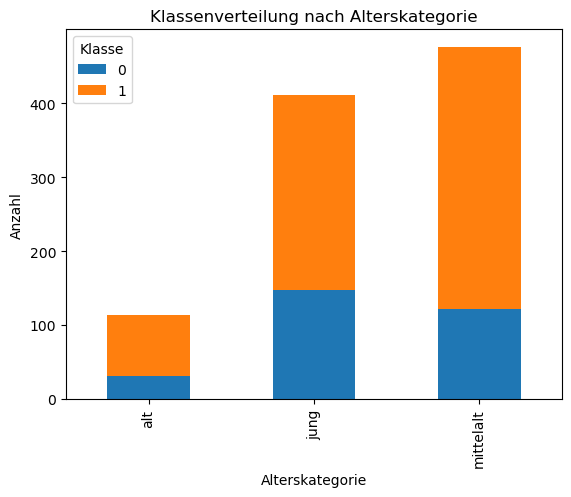

In [29]:
# Kontingenztabelle erstellen
kontingenztabelle = pd.crosstab(data_original['Alterskategorie'], data_original['Klasse'])

# Gestapeltes Balkendiagramm
kontingenztabelle.plot(kind='bar', stacked=True)
plt.title('Klassenverteilung nach Alterskategorie')
plt.ylabel('Anzahl')
plt.show()

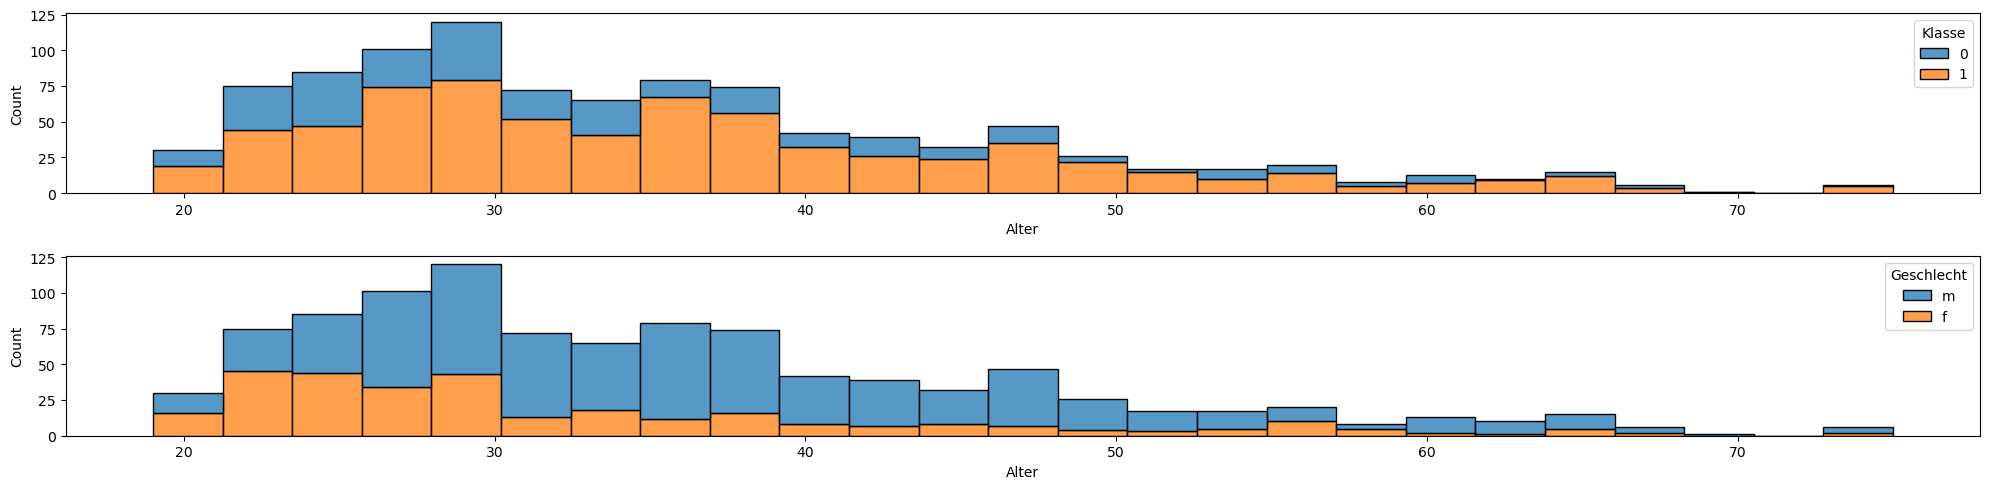

In [31]:
plt.figure(figsize=(20,5))

plt.subplot(2,1,1)
sns.histplot(data=data_original, x='Alter', hue='Klasse', bins=25, multiple='stack')

plt.subplot(2,1,2)
sns.histplot(data=data_original, x='Alter', hue='Geschlecht', bins=25, multiple='stack')

plt.tight_layout()
plt.show()

In [33]:
from scipy.stats import chi2_contingency

# Chi-Quadrat-Test
chi2, p, dof, expected = chi2_contingency(kontingenztabelle)

print("Chi-Quadrat-Wert:", chi2)
print("p-Wert:", p)

if p < 0.05:
    print(f"Es gibt eine signifikante Abhängigkeit zwischen {data_original.columns[22]} und der Klasse.")
else:
    print("Keine signifikante Abhängigkeit festgestellt.")


Chi-Quadrat-Wert: 12.177295395474472
p-Wert: 0.0022684745047508396
Es gibt eine signifikante Abhängigkeit zwischen Alterskategorie und der Klasse.


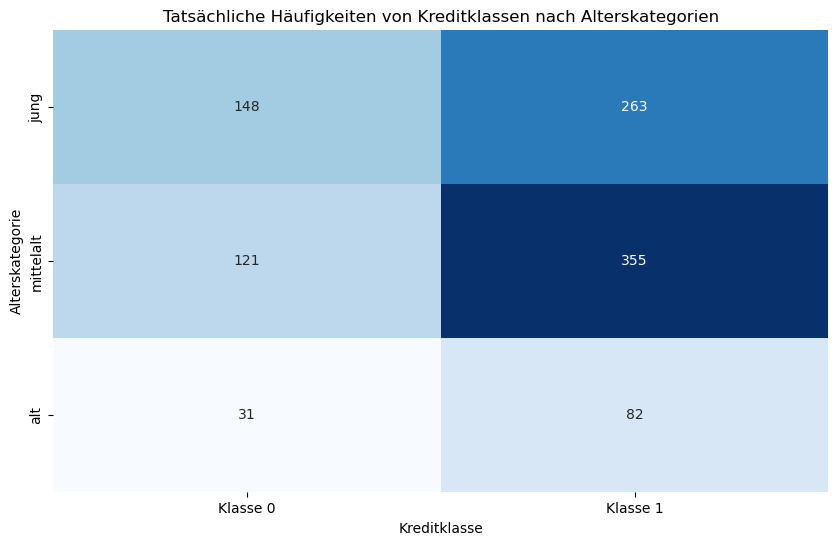

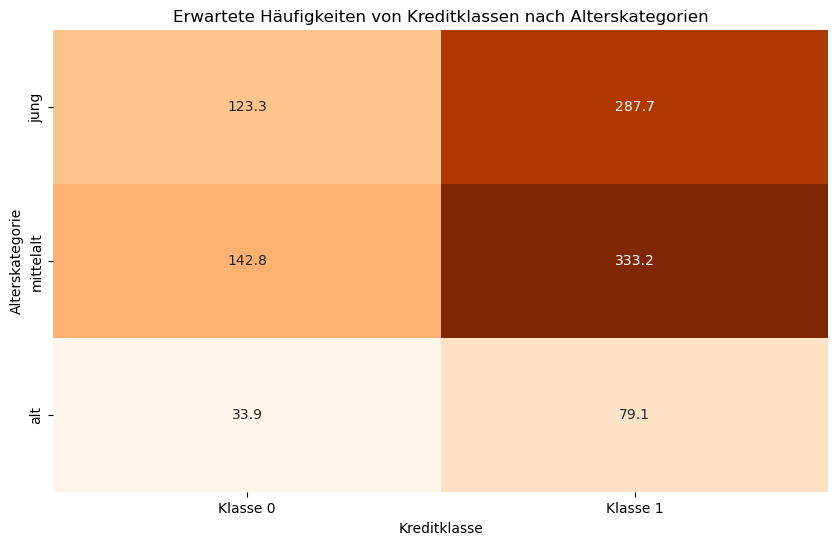

In [35]:
# Kreuztabelle und erwartete Häufigkeiten des Chi-Quadrat-Tests
data_age = {
        'jung': [148, 263],       # data_original[data_original['Alterskategorie'] == 'jung']['Klasse'].value_counts()
        'mittelalt': [121, 355],  # data_original[data_original['Alterskategorie'] == 'mittelalt']['Klasse'].value_counts()
        'alt': [31, 82]           # data_original[data_original['Alterskategorie'] == 'alt']['Klasse'].value_counts()
}
kreuztabelle = pd.DataFrame(data_age, index=['Klasse 0', 'Klasse 1']).T

# Erwartete Häufigkeiten manuell aus den ursprünglichen Werten geschätzt
gesamtsumme = kreuztabelle.sum().sum()
zeilensummen = kreuztabelle.sum(axis=1)
spaltensummen = kreuztabelle.sum(axis=0)
erwartete = np.outer(zeilensummen, spaltensummen) / gesamtsumme
erwartete_häufigkeiten = pd.DataFrame(erwartete, index=kreuztabelle.index, columns=kreuztabelle.columns)

# Schritt 3: Visualisierung
# Heatmap für die tatsächlichen Häufigkeiten
plt.figure(figsize=(10, 6))
sns.heatmap(kreuztabelle, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Tatsächliche Häufigkeiten von Kreditklassen nach Alterskategorien")
plt.xlabel("Kreditklasse")
plt.ylabel("Alterskategorie")
plt.show()

# Heatmap für die erwarteten Häufigkeiten
plt.figure(figsize=(10, 6))
sns.heatmap(erwartete_häufigkeiten, annot=True, fmt=".1f", cmap="Oranges", cbar=False)
plt.title("Erwartete Häufigkeiten von Kreditklassen nach Alterskategorien")
plt.xlabel("Kreditklasse")
plt.ylabel("Alterskategorie")
plt.show()

### Tatsächliche Häufigkeiten:
Die Heatmap der tatsächlichen Häufigkeiten zeigt:
- jung (148, 263): Hier gibt es mehr Personen mit Klasse 1 (gute Kredite).
- mittel_alt (121, 355): Die Verteilung ist stark in Richtung Klasse 1 verschoben, was die Stabilität dieser Altersgruppe zeigt.
- alt (31, 82): Auch hier dominieren die guten Kredite, jedoch bei insgesamt kleineren Gruppen.

### Erwartete Häufigkeiten:
Die Heatmap der erwarteten Häufigkeiten zeigt die Werte, die auftreten würden, wenn kein Zusammenhang zwischen Alterskategorien und Kreditklasse besteht.
Unterschiede zur tatsächlichen Verteilung sind klar erkennbar, z. B. bei den "Jungen" (tatsächlich 148 zu 123.3 erwartet bei Klasse 0).
Insbesondere die Mittelalten weichen deutlich ab, mit tatsächlich 121 in Klasse 0 gegenüber 142.8 erwartet.

### Interpretation:
Die signifikante Abhängigkeit (erkennbar durch den p-Wert im Chi-Quadrat-Test) wird hier visuell bestätigt.
Die Alterskategorie "Mittelalt" hat die stärkste Verschiebung zu guten Krediten, während "Jung" relativ ausgeglichen ist.
Es könnte sinnvoll sein, Modelle auf diese Altersgruppen individuell anzupassen, da die Kreditklassenzusammensetzung stark variiert.

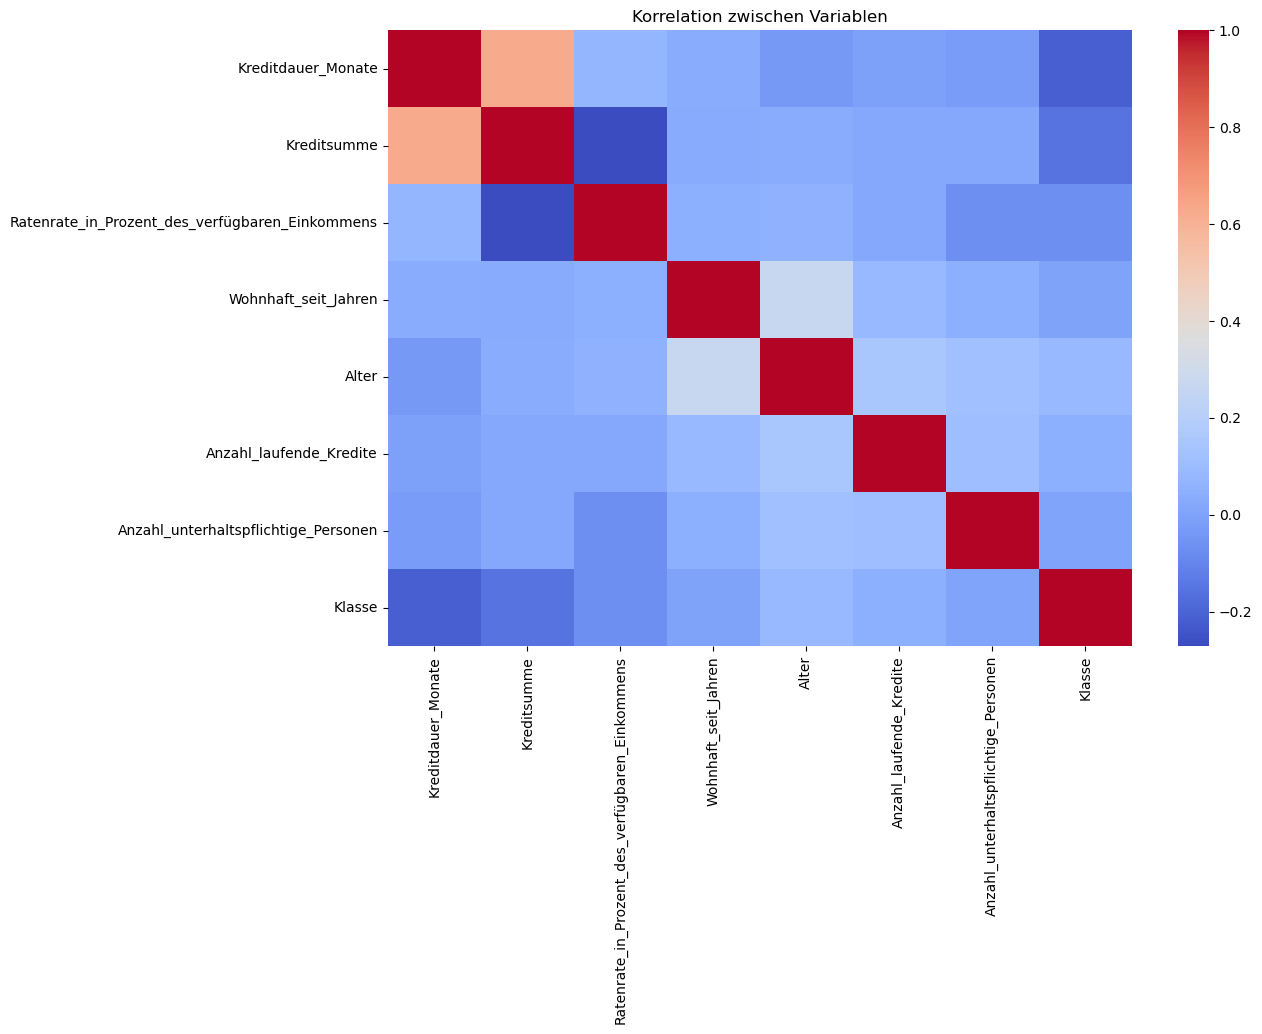

In [37]:
# Korrelation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_original.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title('Korrelation zwischen Variablen')
plt.show()

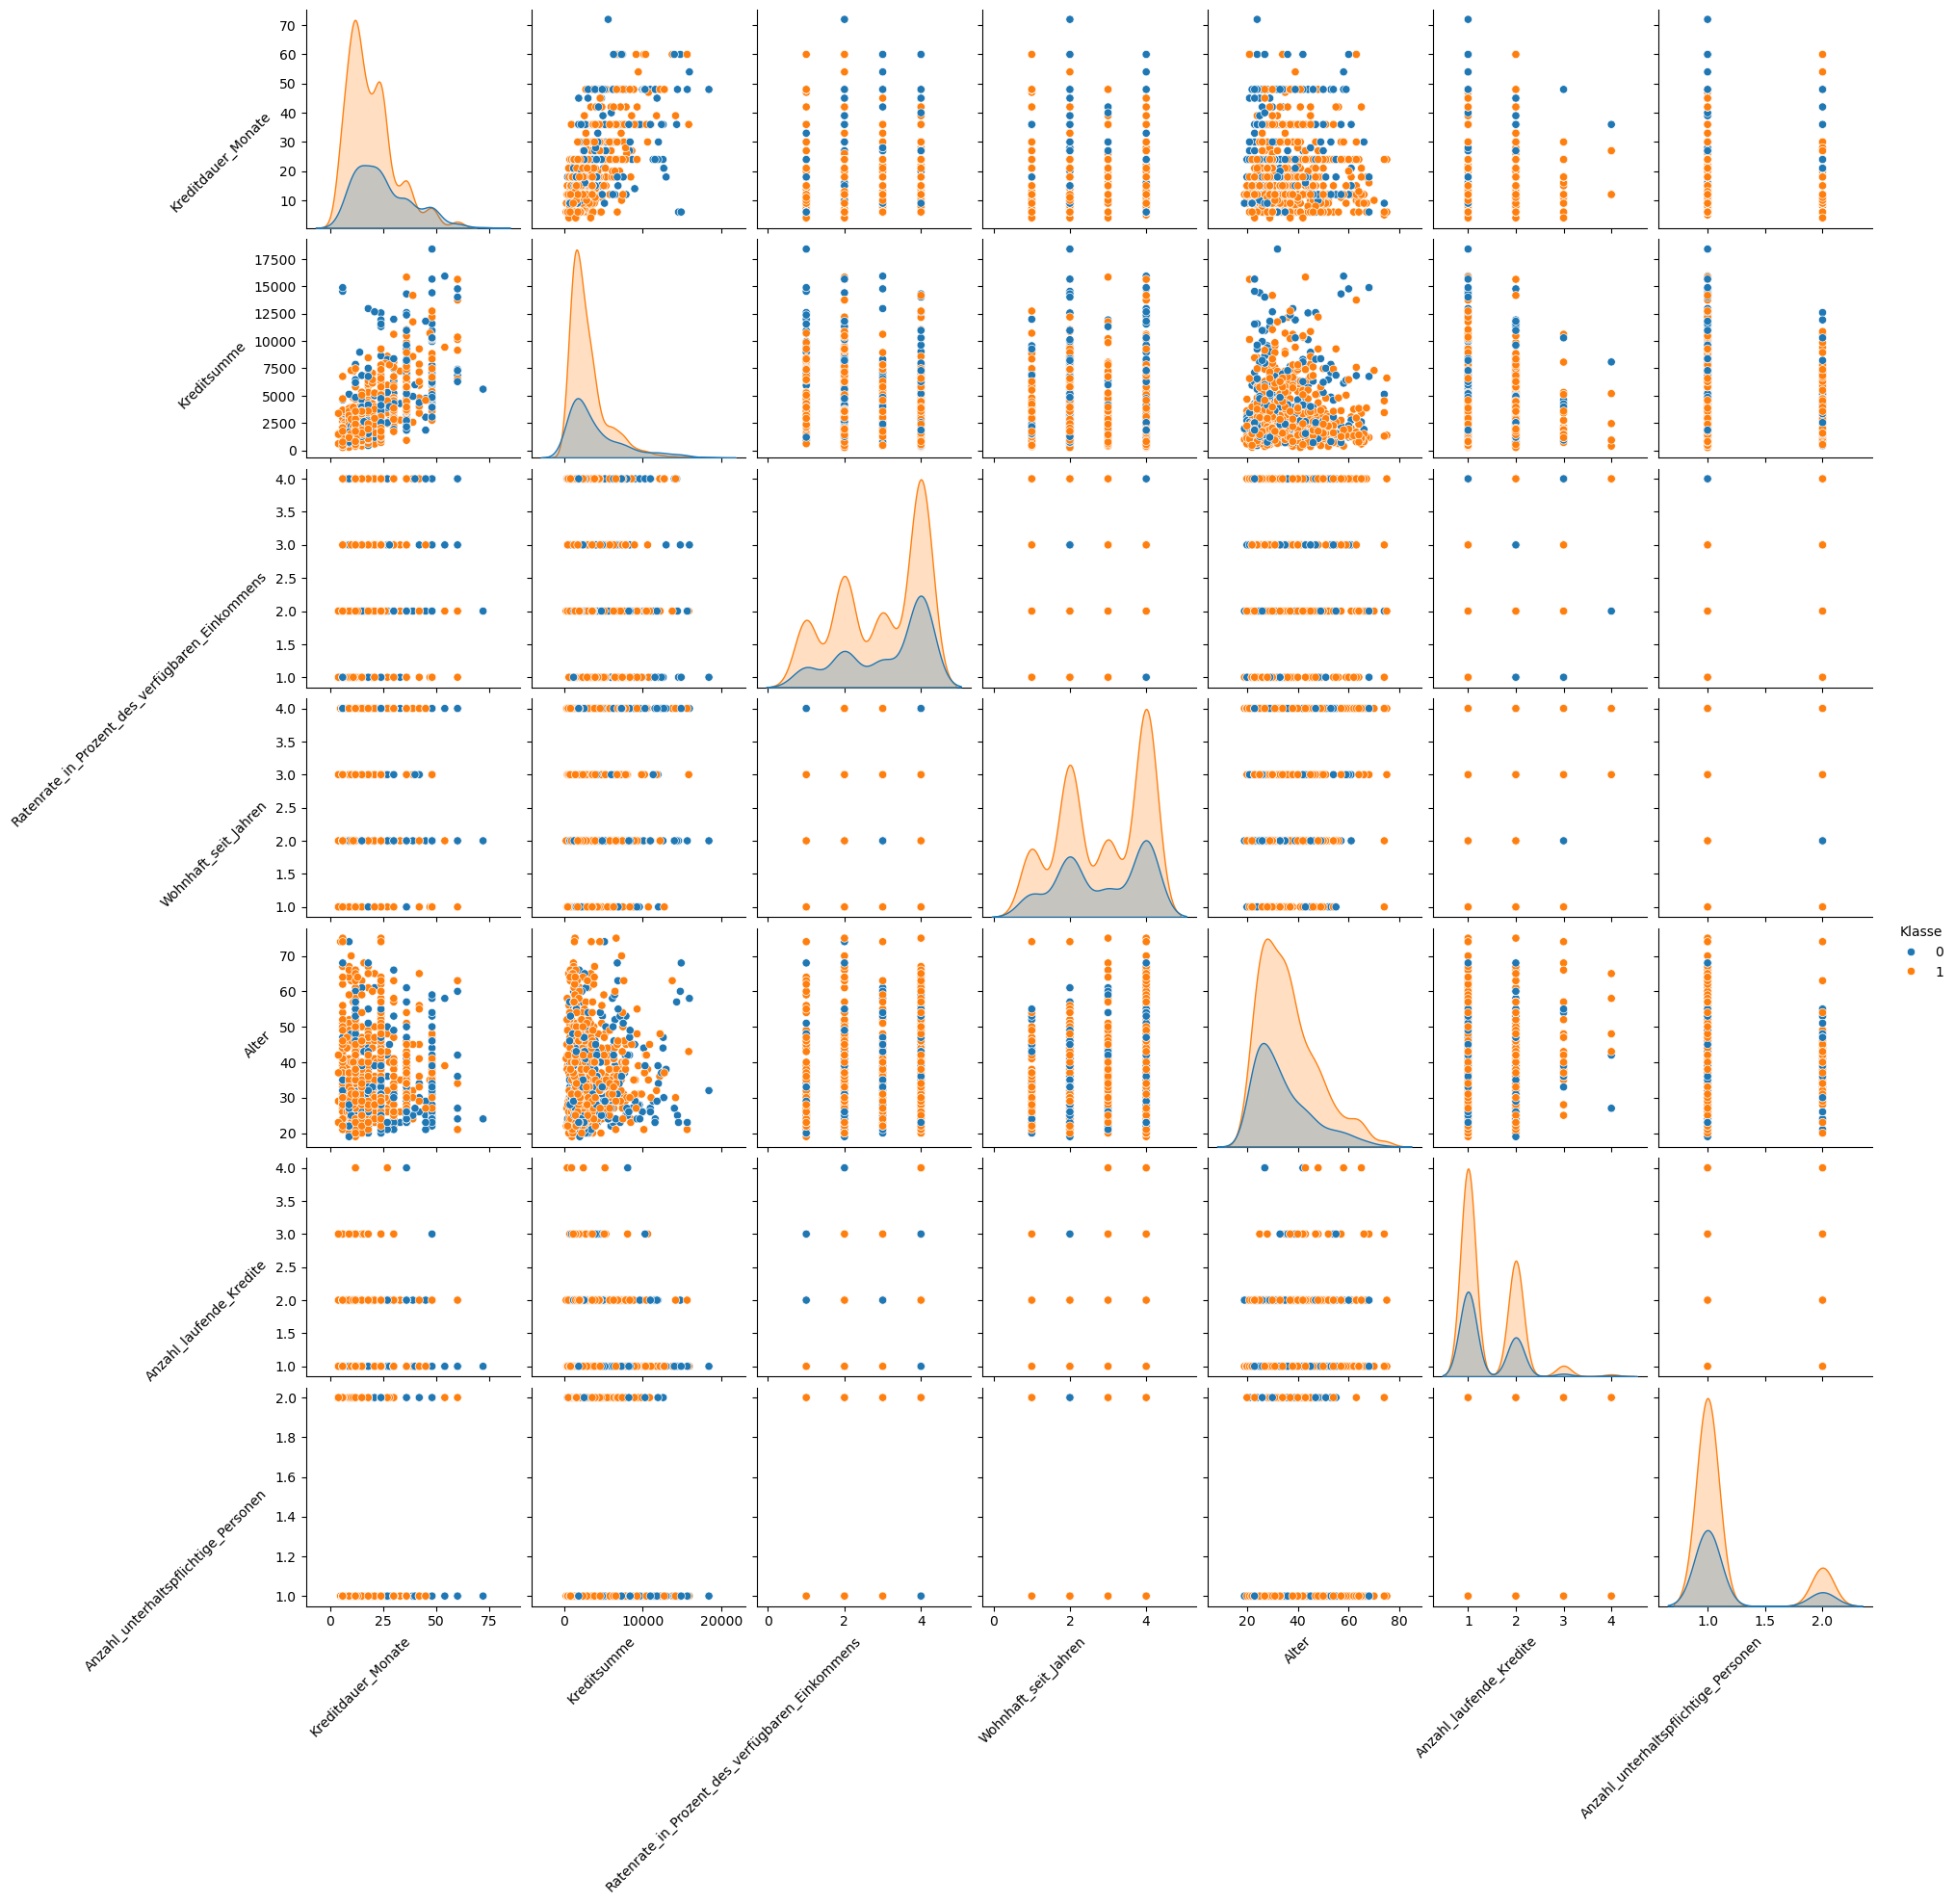

In [39]:
# Pairplot erstellen
method = sns.pairplot(data_original, hue='Klasse')

# Anpassung der Beschriftungen für die x- und y-Achsen
for ax in method.axes.flatten():  # Gehe durch alle Subplots
    ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right')  # X-Achsenticks drehen
    ax.set_ylabel(ax.get_ylabel(), rotation=45, ha='right')  # Y-Achsenticks drehen

plt.show()

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

## Data Preparation

In [41]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Stand_Girokonto                                  1000 non-null   object
 1   Kreditdauer_Monate                               1000 non-null   int64 
 2   Kredittilgungszuverlässigkeit                    1000 non-null   object
 3   Verwendungszweck                                 1000 non-null   object
 4   Kreditsumme                                      1000 non-null   int64 
 5   Ersparnisse                                      1000 non-null   object
 6   laufendes_EK                                     1000 non-null   object
 7   Ratenrate_in_Prozent_des_verfügbaren_Einkommens  1000 non-null   int64 
 8   Status_Geschlecht                                1000 non-null   object
 9   Schuldner_Bürgen                          

### Um in Bezug auf die ML-Modelle die Komplexität zu verringern und gleichzeitig die Erklärungskraft zu erhöhen, wurden im Rahmen der Phase 'Data Preparation' folgende Anpassungen vorgenommen:

- Feature-Transformationen:
  Berechnung neuer abgeleiteter Variablen, z. B. „Monatliche Belastung“, um bestehende Features zu kombinieren und relevante Informationen zu bündeln.

- Feature-Reduktionen:
  Entfernung von Features mit geringer Erklärungskraft basierend auf explorativer Datenanalyse und Modelltests, wie [Telephone, Foreign Worker, etc.].

- Kategorische Variablen:
  Umwandlung kategorialer Variablen in numerische Repräsentationen durch Label-Encoding oder One-Hot-Encoding.

- Balancierung der Klassen:
  Anwendung von Gewichtung, um die Klassenverteilung bei der Zielvariablen zu verbessern und Verzerrungen zu minimieren.


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

## Feature Reduktionen

### Feature: Verwendungszweck (Purpose)

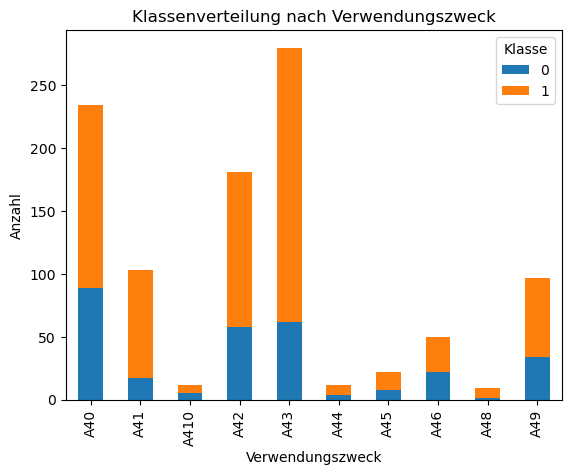

In [43]:
# Kontingenztabelle erstellen
kontingenztabelle = pd.crosstab(data_original['Verwendungszweck'], data_original['Klasse'])

# Gestapeltes Balkendiagramm
kontingenztabelle.plot(kind='bar', stacked=True)
plt.title('Klassenverteilung nach Verwendungszweck')
plt.ylabel('Anzahl')
plt.show()

In [45]:
from scipy.stats import chi2_contingency

# Chi-Quadrat-Test
chi2, p, dof, expected = chi2_contingency(kontingenztabelle)

print("Chi-Quadrat-Wert:", chi2)
print("p-Wert:", p)

if p < 0.05:
    print(f"Es gibt eine signifikante Abhängigkeit zwischen {data_original.columns[3]} und der Zielvariable.")
else:
    print("Keine signifikante Abhängigkeit festgestellt.")

Chi-Quadrat-Wert: 33.35644686141815
p-Wert: 0.00011574910079691586
Es gibt eine signifikante Abhängigkeit zwischen Verwendungszweck und der Zielvariable.


In [47]:
from sklearn.feature_selection import mutual_info_classif

# Umwandlung der kategorialen Daten in numerische Werte (z.B. mit Label Encoding)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_original['Verwendungszweck_encoded'] = encoder.fit_transform(data_original['Verwendungszweck'])

# Mutual Information berechnen
mi_score = mutual_info_classif(data_original[['Verwendungszweck_encoded']], data_original['Klasse'], discrete_features=True)
print(f"Mutual Information Score für {data_original.columns[3]}: {mi_score[0]}")

Mutual Information Score für Verwendungszweck: 0.01725488706656706


#### Das Feature Purpose wurde entfernt, weil:

- Es trotz statistischer Abhängigkeit (Chi-Quadrat-Test) nur einen geringen Informationsgewinn liefert (MI-Score).
- Die Klassenverteilung innerhalb von Purpose keine starke Trennung zwischen den Zielklassen ermöglicht.
- Die hohe Anzahl von Kategorien die Modellierung erschweren könnte, insbesondere bei geringer Datenmenge.
- Modelle ohne Purpose eine bessere Leistung erzielten, was darauf hinweist, dass es eher Rauschen als nützliche Informationen für die Vorhersage beiträgt.

Die Entfernung von Purpose trägt zur Vereinfachung des Modells und zur Verbesserung der Modellleistung bei.

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

### Feature: Ratenrate_in_Prozent_des_verfügbaren_Einkommens (Installment_rate_in_percentage_of_disposable_income)

In [49]:
# Korrelation zwischen Feature und Klassenvariable
np.corrcoef(data_original['Ratenrate_in_Prozent_des_verfügbaren_Einkommens'],data_original['Kreditsumme'])

array([[ 1.       , -0.2713157],
       [-0.2713157,  1.       ]])

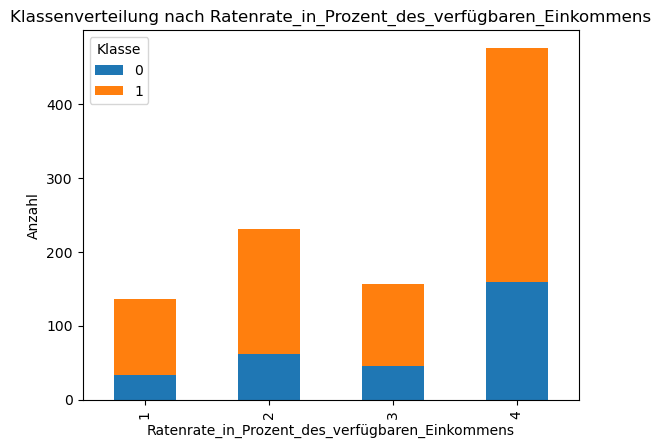

In [51]:
# Kontingenztabelle erstellen
kontingenztabelle = pd.crosstab(data_original['Ratenrate_in_Prozent_des_verfügbaren_Einkommens'], data_original['Klasse'])

# Gestapeltes Balkendiagramm
kontingenztabelle.plot(kind='bar', stacked=True)
plt.title('Klassenverteilung nach Ratenrate_in_Prozent_des_verfügbaren_Einkommens')
plt.ylabel('Anzahl')
plt.show()

In [53]:
# Chi-Quadrat-Test
chi2, p, dof, expected = chi2_contingency(kontingenztabelle)

print("Chi-Quadrat-Wert:", chi2)
print("p-Wert:", p)

if p < 0.05:
    print(f"Es gibt eine signifikante Abhängigkeit zwischen {data_original.columns[7]} und der Zielvariable.")
else:
    print("Keine signifikante Abhängigkeit festgestellt.")

Chi-Quadrat-Wert: 5.476792145153753
p-Wert: 0.1400333122128481
Keine signifikante Abhängigkeit festgestellt.


In [55]:
# Mutual Information berechnen
mi_score = mutual_info_classif(data_original[['Ratenrate_in_Prozent_des_verfügbaren_Einkommens']], data_original['Klasse'], discrete_features=True)
print(f"Mutual Information Score für {data_original.columns[7]}: {mi_score[0]}")

Mutual Information Score für Ratenrate_in_Prozent_des_verfügbaren_Einkommens: 0.0027532719939854927


#### Das Feature Installment_rate_in_percentage_of_disposable_income wurde entfernt, weil:

- Es keine signifikante Abhängigkeit zur Zielvariable aufweist.
- Es keinen relevanten Informationsgewinn bietet.
- Es redundante Informationen mit Credit_amount enthalten könnte.
- Seine Entfernung zu einer Verbesserung der Modellleistung geführt hat.

Diese Entscheidung reduziert die Komplexität des Modells und verbessert gleichzeitig die Interpretierbarkeit und Leistung.

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

### Feature: Schuldner_Bürgen (Other_debtors/guarantors)

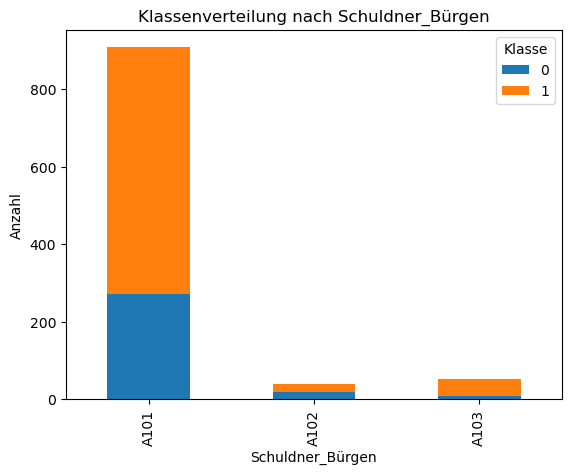

In [57]:
# Kontingenztabelle erstellen
kontingenztabelle = pd.crosstab(data_original['Schuldner_Bürgen'], data_original['Klasse'])

# Gestapeltes Balkendiagramm
kontingenztabelle.plot(kind='bar', stacked=True)
plt.title('Klassenverteilung nach Schuldner_Bürgen')
plt.ylabel('Anzahl')
plt.show()

In [59]:
# Chi-Quadrat-Test
chi2, p, dof, expected = chi2_contingency(kontingenztabelle)

print("Chi-Quadrat-Wert:", chi2)
print("p-Wert:", p)

if p < 0.05:
    print(f"Es gibt eine signifikante Abhängigkeit zwischen {data_original.columns[9]} und der Zielvariable.")
else:
    print("Keine signifikante Abhängigkeit festgestellt.")

Chi-Quadrat-Wert: 6.645366537264243
p-Wert: 0.036055954027247226
Es gibt eine signifikante Abhängigkeit zwischen Schuldner_Bürgen und der Zielvariable.


In [61]:
# Umwandlung der kategorialen Daten in numerische Werte (z.B. mit Label Encoding)
encoder = LabelEncoder()
data_original['Schuldner_Bürgen_encoded'] = encoder.fit_transform(data_original['Schuldner_Bürgen'])

# Mutual Information berechnen
mi_score = mutual_info_classif(data_original[['Schuldner_Bürgen_encoded']], data_original['Klasse'], discrete_features=True)
print(f"Mutual Information Score für {data_original.columns[9]}: {mi_score[0]}")

Mutual Information Score für Schuldner_Bürgen: 0.0033250415350678103


### Das Feature Other_debtors/guarantors wurde entfernt, weil es:

- nur geringe statistische und informative Relevanz für die Zielvariable hat
- seine Entfernung zu einer besseren Modellleistung geführt hat.

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

### Feature: Sonstige_Ratenzahlungspläne (Other_installment_plans)

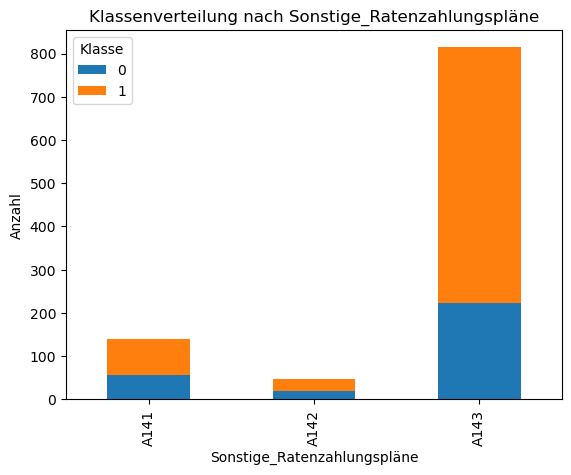

In [63]:
# Kontingenztabelle erstellen
kontingenztabelle = pd.crosstab(data_original['Sonstige_Ratenzahlungspläne'], data_original['Klasse'])

# Gestapeltes Balkendiagramm
kontingenztabelle.plot(kind='bar', stacked=True)
plt.title('Klassenverteilung nach Sonstige_Ratenzahlungspläne')
plt.ylabel('Anzahl')
plt.show()

In [65]:
# Nur Ausprägung 'None' --> A143 betrachten:
result = data_original[data_original['Sonstige_Ratenzahlungspläne'] == 'A143'].groupby('Klasse').size().reset_index(name='Anzahl')
print(result)

   Klasse  Anzahl
0       0     224
1       1     590


In [67]:
# Chi-Quadrat-Test
chi2, p, dof, expected = chi2_contingency(kontingenztabelle)

print("Chi-Quadrat-Wert:", chi2)
print("p-Wert:", p)

if p < 0.05:
    print(f"Es gibt eine signifikante Abhängigkeit zwischen {data_original.columns[13]} und der Zielvariable.")
else:
    print("Keine signifikante Abhängigkeit festgestellt.")

Chi-Quadrat-Wert: 12.839187735866135
p-Wert: 0.0016293178186473534
Es gibt eine signifikante Abhängigkeit zwischen Sonstige_Ratenzahlungspläne und der Zielvariable.


In [69]:
# Umwandlung der kategorialen Daten in numerische Werte (z.B. mit Label Encoding)
encoder = LabelEncoder()
data_original['Sonstige_Ratenzahlungspläne_encoded'] = encoder.fit_transform(data_original['Sonstige_Ratenzahlungspläne'])

# Mutual Information berechnen
mi_score = mutual_info_classif(data_original[['Sonstige_Ratenzahlungspläne_encoded']], data_original['Klasse'], discrete_features=True)
print(f"Mutual Information Score für {data_original.columns[13]}: {mi_score[0]}")

Mutual Information Score für Sonstige_Ratenzahlungspläne: 0.006151729960982663


#### Das Feature Other_installment_plans wurde entfernt, weil:

- Es keine relevanten Informationen zur Zielvorhersage bietet.
  Der Mutual Information Score für dieses Feature beträgt lediglich 0.006, was auf einen minimalen Informationsgewinn für die Zielvariable Class hinweist.
- Es trotz statistischer Abhängigkeit keine signifikante Verbesserung der Trennschärfe liefert.
  Der Chi-Quadrat-Test zeigt zwar eine statistische Abhängigkeit (p-Wert: 0.0016), jedoch spiegelt sich dies nicht in der Modellleistung wider.
- Die Verteilung der Kategorien stark unausgewogen ist.
  Über 80 % der Einträge entfallen auf die Kategorie None (A143), wodurch die Differenzierung zwischen den Zielklassen stark eingeschränkt wird.
- Die Entfernung des Features zu einer verbesserten Modellleistung geführt hat.

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

### Feature: Telefon (Telephone)

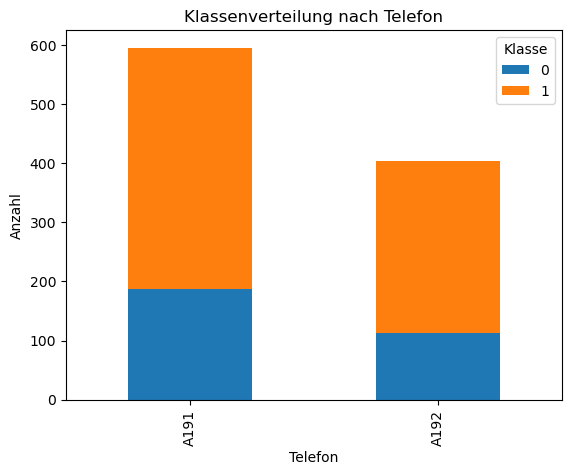

In [71]:
# Kontingenztabelle erstellen
kontingenztabelle = pd.crosstab(data_original['Telefon'], data_original['Klasse'])

# Gestapeltes Balkendiagramm
kontingenztabelle.plot(kind='bar', stacked=True)
plt.title('Klassenverteilung nach Telefon')
plt.ylabel('Anzahl')
plt.show()

In [73]:
# Chi-Quadrat-Test
chi2, p, dof, expected = chi2_contingency(kontingenztabelle)

print("Chi-Quadrat-Wert:", chi2)
print("p-Wert:", p)

if p < 0.05:
    print(f"Es gibt eine signifikante Abhängigkeit zwischen {data_original.columns[18]} und der Zielvariable.")
else:
    print("Keine signifikante Abhängigkeit festgestellt.")

Chi-Quadrat-Wert: 1.1725585310208857
p-Wert: 0.27887615430357415
Keine signifikante Abhängigkeit festgestellt.


In [75]:
# Umwandlung der kategorialen Daten in numerische Werte (z.B. mit Label Encoding)
encoder = LabelEncoder()
data_original['Telefon_encoded'] = encoder.fit_transform(data_original['Telefon'])

# Mutual Information berechnen
mi_score = mutual_info_classif(data_original[['Telefon_encoded']], data_original['Klasse'], discrete_features=True)
print(f"Mutual Information Score für {data_original.columns[18]}: {mi_score[0]}")

Mutual Information Score für Telefon: 0.0006679582223530767


#### Das Feature Telephone wurde entfernt, weil:

- Fehlende signifikante Abhängigkeit zur Zielvariable
- Der MI-Score zeigt, dass das Feature nahezu keinen Beitrag zur Unterscheidung zwischen den Zielklassen leistet.
- Unklare Geschäftsrelevanz

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

### Feature: Gastarbeiter (Foreign_worker)

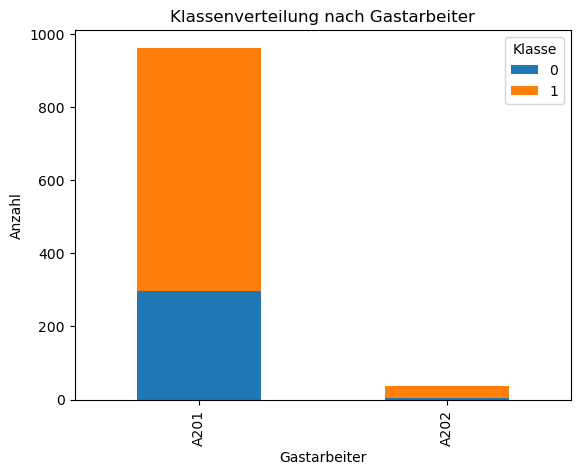

In [77]:
# Kontingenztabelle erstellen
kontingenztabelle = pd.crosstab(data_original['Gastarbeiter'], data_original['Klasse'])

# Gestapeltes Balkendiagramm
kontingenztabelle.plot(kind='bar', stacked=True)
plt.title('Klassenverteilung nach Gastarbeiter')
plt.ylabel('Anzahl')
plt.show()

In [79]:
# Chi-Quadrat-Test
chi2, p, dof, expected = chi2_contingency(kontingenztabelle)

print("Chi-Quadrat-Wert:", chi2)
print("p-Wert:", p)

if p < 0.05:
    print(f"Es gibt eine signifikante Abhängigkeit zwischen {data_original.columns[19]} und der Zielvariable.")
else:
    print("Keine signifikante Abhängigkeit festgestellt.")

Chi-Quadrat-Wert: 5.82157591503386
p-Wert: 0.015830754902852868
Es gibt eine signifikante Abhängigkeit zwischen Gastarbeiter und der Zielvariable.


In [81]:
# Umwandlung der kategorialen Daten in numerische Werte (z.B. mit Label Encoding)
encoder = LabelEncoder()
data_original['Gastarbeiter_encoded'] = encoder.fit_transform(data_original['Gastarbeiter'])

# Mutual Information berechnen
mi_score = mutual_info_classif(data_original[['Gastarbeiter_encoded']], data_original['Klasse'], discrete_features=True)
print(f"Mutual Information Score für {data_original.columns[19]}: {mi_score[0]}")

Mutual Information Score für Gastarbeiter: 0.004036189803978272


#### Das Feature Foreign_worker wurde entfernt, weil:

- Unausgeglichene Verteilung: Der Großteil der Werte fällt in eine Kategorie (A201). Dadurch trägt dieses Feature wenig zur Diskriminierung der Zielklassen bei.
- Geringer Informationsgewinn: Der Mutual Information Score beträgt lediglich 0.004.
- Irrelevanz trotz signifikanter Abhängigkeit: Der Chi-Quadrat-Test zeigt zwar eine signifikante Abhängigkeit zwischen Foreign_worker und der Zielvariablen (p-Wert = 0.0158), jedoch spiegelt sich dies nicht in einer verbesserten Modellleistung wider.
- Keine Verbesserung der Vorhersagefähigkeit: Die Entfernung des Features hat die Modellgenauigkeit und Interpretierbarkeit nicht beeinträchtigt, sondern sogar vereinfacht.

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

In [83]:
data_original.columns

Index(['Stand_Girokonto', 'Kreditdauer_Monate',
       'Kredittilgungszuverlässigkeit', 'Verwendungszweck', 'Kreditsumme',
       'Ersparnisse', 'laufendes_EK',
       'Ratenrate_in_Prozent_des_verfügbaren_Einkommens', 'Status_Geschlecht',
       'Schuldner_Bürgen', 'Wohnhaft_seit_Jahren', 'Vermögen', 'Alter',
       'Sonstige_Ratenzahlungspläne', 'Wohnsituation',
       'Anzahl_laufende_Kredite', 'Arbeitsqualifikation',
       'Anzahl_unterhaltspflichtige_Personen', 'Telefon', 'Gastarbeiter',
       'Klasse', 'Geschlecht', 'Alterskategorie', 'Verwendungszweck_encoded',
       'Schuldner_Bürgen_encoded', 'Sonstige_Ratenzahlungspläne_encoded',
       'Telefon_encoded', 'Gastarbeiter_encoded'],
      dtype='object')

In [85]:
# Entfernen vorher identifizierter Features:
data_original = data_original.drop(['Verwendungszweck','Ratenrate_in_Prozent_des_verfügbaren_Einkommens','Schuldner_Bürgen',
                                    'Sonstige_Ratenzahlungspläne','Telefon','Gastarbeiter','Status_Geschlecht',
                                    'Verwendungszweck_encoded','Schuldner_Bürgen_encoded','Sonstige_Ratenzahlungspläne_encoded',
                                    'Telefon_encoded', 'Gastarbeiter_encoded'],axis=1)

### Feature Balancierung

In [87]:
# Einige Features neu gewichten:

# Mapping für Stand_Girokonto
girokonto_mapping = {
    'A11': 'negativ',
    'A12': 'gering',  
    'A13': 'hoch',  
    'A14': 'kein Konto'  
}


# Mapping für Kredittilgungszuverlässigkeit
tilgung_mapping = {
    'A30': 'gut',
    'A31': 'gut',  
    'A32': 'gut',  
    'A33': 'schlecht',
    'A34': 'schlecht'
}

# Mapping für Ersparnisse
ersparnisse_mapping = {
    'A61': '<= 1000',
    'A62': '<= 1000',  
    'A63': '<= 1000',  
    'A64': '> 1000',
    'A65': 'Keine'
}

# Mapping für laufendes_EK
ek_mapping = {
    'A71': 'instabil',
    'A72': 'instabil',  
    'A73': 'moderat',  
    'A74': 'moderat',
    'A75': 'stabil'
}

# Mapping für Vermögen
property_mapping = {
    'A121': 'hoch',
    'A122': 'mittel',  
    'A123': 'gering',  
    'A124': 'Kein'  
}

# Mapping für Wohnsituation
housing_mapping = {
    'A151': 'Miete',
    'A152': 'Eigentum',  
    'A153': 'Kostenfrei'   
}

# Mapping für Arbeitsqualifikation
job_mapping = {
    'A171': 'unqualifiziert_gebietsfremd',
    'A172': 'unqualifiziert_gebietsansässig',  
    'A173': 'qualifiziert',  
    'A174': 'hochqualifiziert'  
}

In [89]:
# Mapping auf alle betreffenden Spalten anwenden:
data_original['Stand_Girokonto'] = data_original['Stand_Girokonto'].map(girokonto_mapping)
data_original['Kredittilgungszuverlässigkeit'] = data_original['Kredittilgungszuverlässigkeit'].map(tilgung_mapping)
data_original['Ersparnisse'] = data_original['Ersparnisse'].map(ersparnisse_mapping)
data_original['laufendes_EK'] = data_original['laufendes_EK'].map(ek_mapping)
data_original['Vermögen'] = data_original['Vermögen'].map(property_mapping)
data_original['Wohnsituation'] = data_original['Wohnsituation'].map(housing_mapping)
data_original['Arbeitsqualifikation'] = data_original['Arbeitsqualifikation'].map(job_mapping)


In [91]:
data_original

,Stand_Girokonto,Kreditdauer_Monate,Kredittilgungszuverlässigkeit,Kreditsumme,Ersparnisse,laufendes_EK,Wohnhaft_seit_Jahren,Vermögen,Alter,Wohnsituation,Anzahl_laufende_Kredite,Arbeitsqualifikation,Anzahl_unterhaltspflichtige_Personen,Klasse,Geschlecht,Alterskategorie
0,negativ,6,schlecht,1169,Keine,stabil,4,hoch,67,Eigentum,2,qualifiziert,1,1,m,alt
1,gering,48,gut,5951,<= 1000,moderat,2,hoch,22,Eigentum,1,qualifiziert,1,0,f,jung
2,kein Konto,12,schlecht,2096,<= 1000,moderat,3,hoch,49,Eigentum,1,unqualifiziert_gebietsansässig,2,1,m,mittelalt
3,negativ,42,gut,7882,<= 1000,moderat,4,mittel,45,Kostenfrei,1,qualifiziert,2,1,m,mittelalt
4,negativ,24,schlecht,4870,<= 1000,moderat,4,Kein,53,Kostenfrei,2,qualifiziert,2,0,m,alt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,kein Konto,12,gut,1736,<= 1000,moderat,4,hoch,31,Eigentum,1,unqualifiziert_gebietsansässig,1,1,f,mittelalt
996,negativ,30,gut,3857,<= 1000,moderat,4,mittel,40,Eigentum,1,hochqualifiziert,1,1,m,mittelalt
997,kein Konto,12,gut,804,<= 1000,stabil,4,gering,38,Eigentum,1,qualifiziert,1,1,m,mittelalt
998,negativ,45,gut,1845,<= 1000,moderat,4,Kein,23,Kostenfrei,1,qualifiziert,1,0,m,jung


In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

## Feature Transformation

### Neues Feature: Belastungsfaktor

Ein Belastungsfaktor ist eine Kennzahl, die die finanzielle Belastung eines Kreditnehmers quantifiziert. Er wird typischerweise aus der Kombination von Kreditbetrag und Laufzeit berechnet, da diese direkt die monatliche Rückzahlung beeinflussen.

- Typische Ansätze:
Monatliche Belastung:

Basierend auf der Formel für die monatliche Rückzahlung eines Annuitätenkredits:
Monatliche Belastung
=
Kreditsumme
/
Kreditdauer

Dieser Wert zeigt die durchschnittliche monatliche Rückzahlung an.

In [93]:
# Monatliche Belastung berechnen
data_original['Monatliche_Belastung'] = data_original['Kreditsumme'] / data_original['Kreditdauer_Monate']

### Warum in das Modell integrieren?

- Interpretation: Der Belastungsfaktor kann ein Indikator dafür sein, ob ein Kreditnehmer potenziell überfordert ist.
- Feature-Bedeutung: Modelle wie Random Forest oder XGBoost könnten den Belastungsfaktor als entscheidenden Prädiktor erkennen.
- Robustheit: Kombinierte Features (wie der Belastungsfaktor) reduzieren Rauschen, da sie zusätzliche Beziehungen zwischen Variablen berücksichtigen.

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

## Ausreißeranalyse

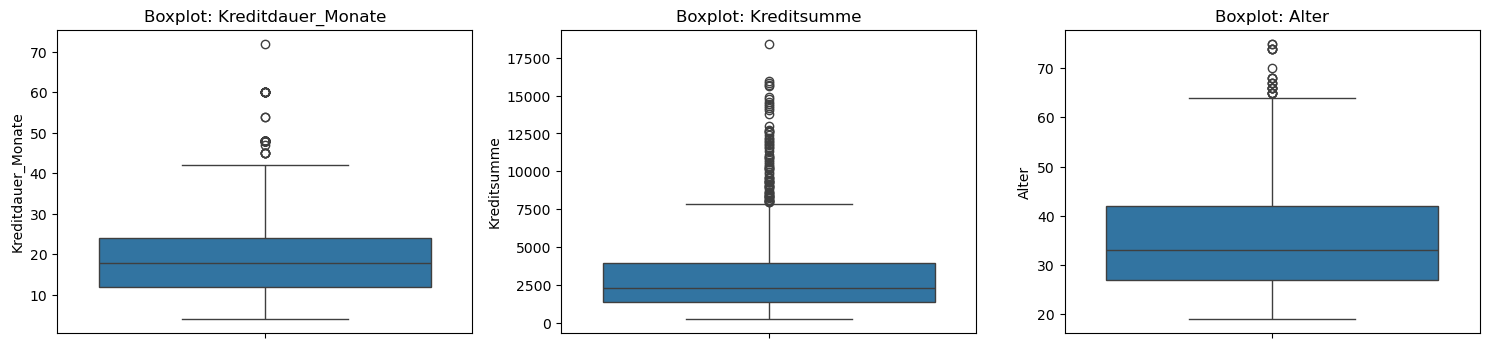

In [95]:
# Features auswählen
num_features_box = ["Kreditdauer_Monate", "Kreditsumme", "Alter"]

# Boxplots für einzelne Features erstellen
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features_box, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data_original[col])
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

In [97]:
# IQR-Methode zur Berechnung, Gruppierung und statistischen Analyse von Ausreißern
def calculate_outliers_and_group(data, features, group_by):
    # IQR-Berechnung
    Q1 = data[features].quantile(0.25)
    Q3 = data[features].quantile(0.75)
    IQR = Q3 - Q1

    # Identifikation der Ausreißer
    outlier_mask = (data[features] < (Q1 - 1.5 * IQR)) | (data[features] > (Q3 + 1.5 * IQR))

    # DataFrame ohne Ausreißer erstellen
    data_cleaned = data.loc[~outlier_mask.any(axis=1), features]
    data_with_outliers = data[features]  # Originaldaten

    # Ausreißer markieren für Gruppierung
    data_outliers = data.copy()
    for feature in features:
        data_outliers[f"{feature}_outlier"] = outlier_mask[feature].astype(int)
    
    # Gruppierung der Ausreißer nach Zielvariable
    outlier_counts = data_outliers.groupby(group_by)[
        [f"{feature}_outlier" for feature in features]
    ].sum()

    # Gesamtanzahl der Ausreißer berechnen
    total_outliers = outlier_mask.sum()

    return outlier_counts, total_outliers, data_with_outliers, data_cleaned

# Features und Zielvariable festlegen
selected_features = ["Kreditdauer_Monate", "Kreditsumme", "Alter"]
outlier_results, total_outliers, df_with_outliers, df_cleaned = calculate_outliers_and_group(
    data_original, selected_features, group_by="Klasse"
)

# Ergebnisse anzeigen
print("Gesamte Anzahl der Ausreißer pro Feature:")
print(total_outliers)

print('---------------------------------------------------------------------------------------')

print("\nStatistiken MIT Ausreißern:")
print()
print(df_with_outliers.describe())

print("\nStatistiken OHNE Ausreißer:")
print()
print(df_cleaned.describe())

print('---------------------------------------------------------------------------------------')

print("\nAnzahl der Ausreißer nach Klasse (Bad Credit = 0, Good Credit = 1):")
print(outlier_results)

Gesamte Anzahl der Ausreißer pro Feature:
Kreditdauer_Monate    70
Kreditsumme           72
Alter                 23
dtype: int64
---------------------------------------------------------------------------------------

Statistiken MIT Ausreißern:

       Kreditdauer_Monate   Kreditsumme        Alter
count         1000.000000   1000.000000  1000.000000
mean            20.903000   3271.258000    35.546000
std             12.058814   2822.736876    11.375469
min              4.000000    250.000000    19.000000
25%             12.000000   1365.500000    27.000000
50%             18.000000   2319.500000    33.000000
75%             24.000000   3972.250000    42.000000
max             72.000000  18424.000000    75.000000

Statistiken OHNE Ausreißer:

       Kreditdauer_Monate  Kreditsumme       Alter
count          862.000000   862.000000  862.000000
mean            18.116009  2531.432715   34.698376
std              8.690069  1663.627810   10.264763
min              4.000000   250.000000   

### Begründung für die Beibehaltung der indentifizierten Ausreißer:
- Ausreißer sind realistische Extremfälle in Kreditrisiko-Szenarien.
- Sie liefern wertvolle Informationen, insbesondere für „Bad Credit“.
- Ihr Ausschluss würde zu Informationsverlust führen und die Ergebnisse verzerren.
- Die Modelle sollen robust genug sein, um mit Ausreißern zu arbeiten.

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

### Alle Features in Übersicht mit entsprechenden Ausprägungen und deren Häufigkeiten:

In [99]:
for item in data_original.columns:
    print(item)
    print()
    print(data_original[item].value_counts())
    print('************************************')
    print('************************************')

Stand_Girokonto

Stand_Girokonto
kein Konto    394
negativ       274
gering        269
hoch           63
Name: count, dtype: int64
************************************
************************************
Kreditdauer_Monate

Kreditdauer_Monate
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: count, dtype: int64
************************************
************************************
Kredittilgungszuverlässigkeit

Kredittilgungszuverlässigkeit
gut         619
schlecht    381
Name: count, dtype: int64
************************************
************************************
Kreditsumme

Kreditsumme
1478    3
1262    3
1258    3
1275    3
1393    3
       ..
1459    1
882     1
3758    1
1136    1
4576    

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

## Weitere Explorative Datenanalyse (EDA)

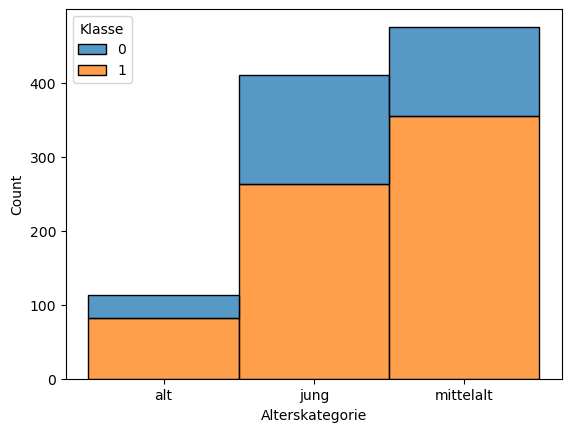

In [101]:
sns.histplot(data_original, x='Alterskategorie', multiple='stack', hue='Klasse')
plt.show()

### Altersgruppen und Kreditwürdigkeit
Verteilung der Kreditklassen (0 = "schlechter Kredit", 1 = "guter Kredit") über die Alterskategorien:

- Ältere (alt): 
    - Geringe Anzahl an Krediten insgesamt, mit einem höheren Anteil an "guter Kredit"

- Jüngere (jung): 
    - Größere Anzahl an Krediten, aber auch ein deutlich höherer Anteil an "schlechter Kredit".

- Mittelalte (mittelalt): 
    - Die größte Kreditgruppe mit einem moderaten Verhältnis von "schlechter Kredit" zu "guter Kredit".

Interpretation: Ältere Kreditnehmer zeigen tendenziell eine bessere Kreditwürdigkeit, während jüngere Kreditnehmer häufiger "schlechter Kredit" aufweisen.

### Analyse der Vermögenskategorien pro Altersgruppe und Kreditklasse

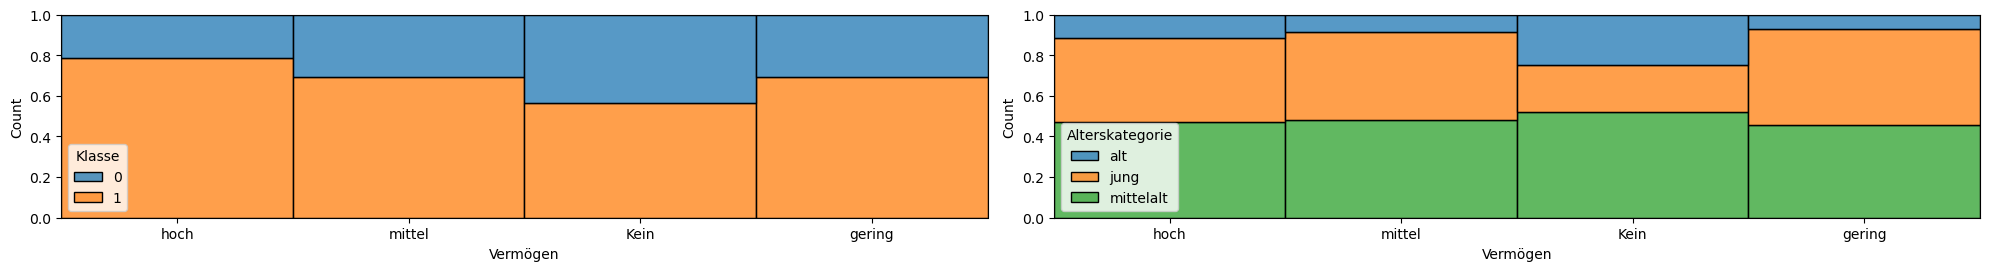

In [107]:
plt.figure(figsize=(20,5))

plt.subplot(2,2,1)
sns.histplot(data=data_original, x='Vermögen', hue='Klasse', bins=10, multiple='fill')

plt.subplot(2,2,2)
sns.histplot(data=data_original, x='Vermögen', hue='Alterskategorie', bins=10, multiple='fill')

plt.tight_layout()
plt.show()

### Grafik links: Vermögensstatus und Kreditwürdigkeit
Verteilung der Kreditklassen nach Vermögenskategorien:

- Kreditnehmer mit hohem Vermögen haben den höchsten Anteil an "guter Kredit".
- Bei mittlerem und geringem Vermögen nimmt der Anteil von "schlechter Kredit" sichtbar zu.
- Kreditnehmer mit keinem Vermögen zeigen den schlechtesten Kreditstatus.

### Grafik rechts: Vermögensstatus und Altersgruppen
Verteilung der Altersgruppen nach Vermögenskategorien:

- tendenziell nimmt das Vermögen mit dem Alter zu von gering --> mittel --> hoch
- interessanterweise ist der Anteil bei keinem Vermögen unerwartet für die junge Altersgruppe sehr klein und für die ältere Altersgruppe sehr hoch

### Weitere Features nach Klassenverteilungen

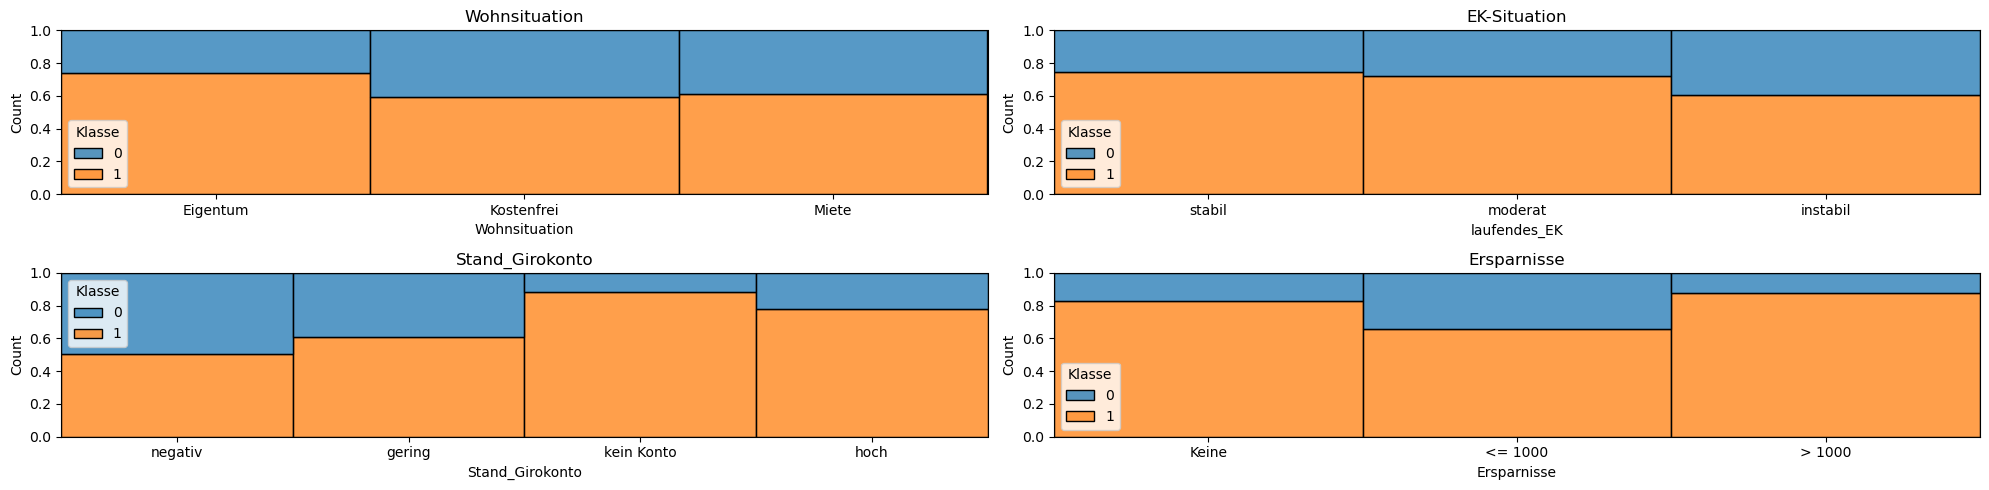

In [109]:
plt.figure(figsize=(20,5))

plt.subplot(2,2,1)
sns.histplot(data=data_original, x='Wohnsituation', hue='Klasse', bins=10, multiple='fill')
plt.title('Wohnsituation')

plt.subplot(2,2,2)
sns.histplot(data=data_original, x='laufendes_EK', hue='Klasse', bins=10, multiple='fill')
plt.title('EK-Situation')

plt.subplot(2,2,3)
sns.histplot(data=data_original, x='Stand_Girokonto', hue='Klasse', bins=10, multiple='fill')
plt.title('Stand_Girokonto')

plt.subplot(2,2,4)
sns.histplot(data=data_original, x='Ersparnisse', hue='Klasse', bins=10, multiple='fill')
plt.title('Ersparnisse')

plt.tight_layout()
plt.show()

### Grafik links oben: Wohnsituation und Kreditwürdigkeit
Verteilung der Kreditklassen nach Wohnsituation:

- Kreditnehmer, die kein Wohneigentum besitzen werden eher als schlechte Kreditnehmer eingestuft
- die Verteilungen bei den anderen beiden Kategorien (Miete und kostenfrei) sind ähnlich

### Grafik rechts oben: Einkommenssituation und Kreditwürdigkeit
Verteilung der Kreditwürdigkeit nach der Einkommenssituation:

- je stabiler die EK-Situation bei einem Kreditnehmer ist, desto eher wird ein solcher als guter Kreditnehmer eingestuft

### Grafik links unten: Girokontostand und Kreditwürdigkeit
Verteilung der Kreditklassen nach Girokontostand:

- interessanterweise werden Kreditnehmer, die kein Konto bei der kreditvergebenden Bank besitzen am besten eingestuft, dies könnte auf Probleme von Informationsasymmetrien hindeuten, bspw. Adverse Selektion
- ansonsten begünstigen höhere Girokontostände den Status, als guter Kreditnehmer eingestuft zu werden

### Grafik rechts unten: Ersparnisse und Kreditwürdigkeit
Verteilung der Kreditwürdigkeit nach der Ersparnisse:

- im Vergleich zu moderaten Ersparnissen bei einigen Kreditnehmern ist auch in dieser Grafik zu sehen, dass Kreditnehmer mit keinen Ersparnissen bzw. bei diesen Kreditnehmern die Höhe der Ersparnisse unbekannt ist, besser eingestuft werden. Wieder könnte hierfür die Problematik von Informationsasymmetrien angebracht werden (Adverse Selektion)
- Kreditnehmer mit hohen Ersparnissen werden erwartungsgemäß eher als gute Kreditnehmer klassifiziert

### Monatliche Belastung nach Alter

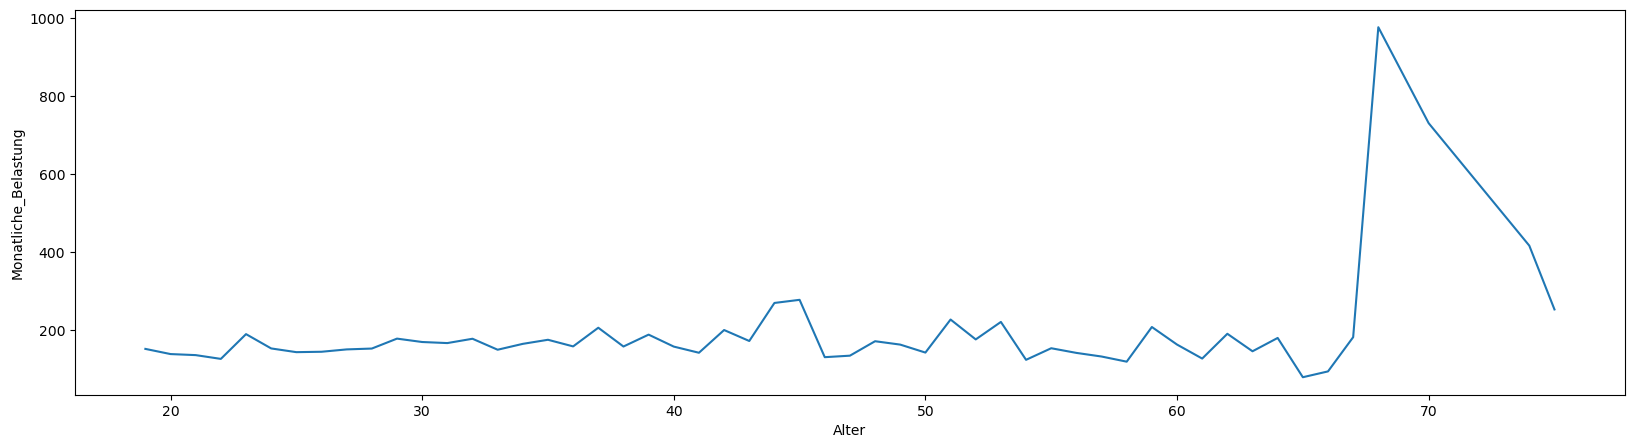

In [111]:
plt.figure(figsize=(20,5))
sns.lineplot(data=data_original, x='Alter', y='Monatliche_Belastung', ci=None)
plt.show()

### Monatliche Belastung nach Alter

- Die monatliche Belastung bleibt bei jüngeren und mittelalten Kreditnehmern relativ stabil.
- Starker Anstieg der monatlichen Belastung bei älteren Kreditnehmern ab etwa 70 Jahren.

Interpretation: Ältere Kreditnehmer mit hohen Belastungen könnten ein höheres finanzielles Risiko darstellen, trotz der insgesamt besseren Kreditwürdigkeit in dieser Gruppe.

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

# Modeling

In [111]:
# Alterskategorie entfernen:
data_original = data_original.drop('Alterskategorie', axis=1)

In [113]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Stand_Girokonto                       1000 non-null   object 
 1   Kreditdauer_Monate                    1000 non-null   int64  
 2   Kredittilgungszuverlässigkeit         1000 non-null   object 
 3   Kreditsumme                           1000 non-null   int64  
 4   Ersparnisse                           1000 non-null   object 
 5   laufendes_EK                          1000 non-null   object 
 6   Wohnhaft_seit_Jahren                  1000 non-null   int64  
 7   Vermögen                              1000 non-null   object 
 8   Alter                                 1000 non-null   int64  
 9   Wohnsituation                         1000 non-null   object 
 10  Anzahl_laufende_Kredite               1000 non-null   int64  
 11  Arbeitsqualifikati

### Daten standardisieren

In [116]:
from sklearn.preprocessing import StandardScaler

# Numerische Spalten identifizieren
numerical_columns = [ 
    'Kreditdauer_Monate', 'Kreditsumme',
    'Wohnhaft_seit_Jahren', 
    'Alter', 'Anzahl_laufende_Kredite', 
    'Anzahl_unterhaltspflichtige_Personen',
    'Monatliche_Belastung'
                    ]

# Standardisierung
scaler = StandardScaler()
data_original[numerical_columns] = scaler.fit_transform(data_original[numerical_columns])

print("Numerische Variablen skaliert!")

Numerische Variablen skaliert!


In [118]:
data_original.columns

Index(['Stand_Girokonto', 'Kreditdauer_Monate',
       'Kredittilgungszuverlässigkeit', 'Kreditsumme', 'Ersparnisse',
       'laufendes_EK', 'Wohnhaft_seit_Jahren', 'Vermögen', 'Alter',
       'Wohnsituation', 'Anzahl_laufende_Kredite', 'Arbeitsqualifikation',
       'Anzahl_unterhaltspflichtige_Personen', 'Klasse', 'Geschlecht',
       'Monatliche_Belastung'],
      dtype='object')

In [120]:
data_original.head(1)

,Stand_Girokonto,Kreditdauer_Monate,Kredittilgungszuverlässigkeit,Kreditsumme,Ersparnisse,laufendes_EK,Wohnhaft_seit_Jahren,Vermögen,Alter,Wohnsituation,Anzahl_laufende_Kredite,Arbeitsqualifikation,Anzahl_unterhaltspflichtige_Personen,Klasse,Geschlecht,Monatliche_Belastung
0,negativ,-1.236478,schlecht,-0.745131,Keine,stabil,1.046987,hoch,2.766456,Eigentum,1.027079,qualifiziert,-0.42829,1,m,0.176948


### Daten transformieren

In [123]:
# Kategorische Variablen in Dummy-Variablen umwandeln

categorical_columns = [
    'Stand_Girokonto', 'Kredittilgungszuverlässigkeit', 
    'Ersparnisse', 'laufendes_EK', 'Vermögen', 
    'Wohnsituation', 'Arbeitsqualifikation', 
    'Geschlecht'
]

# Dummy-Variablen erstellen

data_original = pd.get_dummies(data_original, columns=categorical_columns, drop_first=True, dtype=float)

### Daten in Test- und Trainingsdaten aufteilen

In [125]:
from sklearn.model_selection import train_test_split

# Zielvariable und Features definieren
X = data_original.drop('Klasse', axis=1)  # Features
y = data_original['Klasse']  # Zielvariable

# Datenaufteilung: 80% Training, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Trainingsdatensatz: {X_train.shape}")
print(f"Testdatensatz: {X_test.shape}")

Trainingsdatensatz: (800, 24)
Testdatensatz: (200, 24)


In [127]:
data_original.head(3)

,Kreditdauer_Monate,Kreditsumme,Wohnhaft_seit_Jahren,Alter,Anzahl_laufende_Kredite,Anzahl_unterhaltspflichtige_Personen,Klasse,Monatliche_Belastung,Stand_Girokonto_hoch,Stand_Girokonto_kein Konto,...,laufendes_EK_stabil,Vermögen_gering,Vermögen_hoch,Vermögen_mittel,Wohnsituation_Kostenfrei,Wohnsituation_Miete,Arbeitsqualifikation_qualifiziert,Arbeitsqualifikation_unqualifiziert_gebietsansässig,Arbeitsqualifikation_unqualifiziert_gebietsfremd,Geschlecht_m
0,-1.236478,-0.745131,1.046987,2.766456,1.027079,-0.428290,1,0.176948,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2.248194,0.949817,-0.765977,-1.191404,-0.704926,-0.428290,0,-0.284901,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.738668,-0.416562,0.140505,1.183312,-0.704926,2.334869,1,0.045495,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Modell 1: Logistische Regression
- 1. Modell trainieren

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [131]:
# Modell initialisieren und trainieren
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Vorhersagen erstellen
y_pred = log_model.predict(X_test)

- 2. Modell bewerten

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.67      0.37      0.48        59
           1       0.78      0.92      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.65      0.66       200
weighted avg       0.75      0.76      0.74       200

Confusion Matrix:
[[ 22  37]
 [ 11 130]]


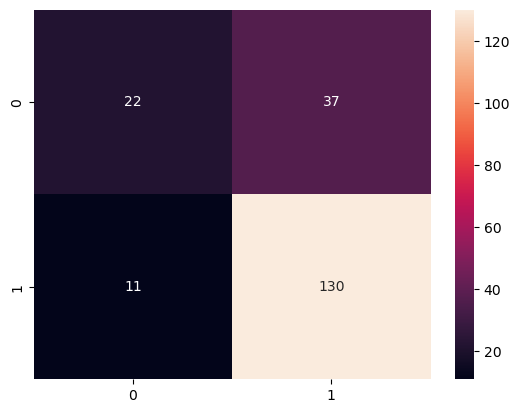

ROC-AUC-Score: 0.76


In [133]:
# Klassifikationsbericht
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

# Confusion-Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.3g')
plt.show()

# ROC-AUC-Score
y_pred_prob = log_model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC-Score: {roc_score:.2f}")

### Modell 2: Random Forest
- 1. Modell trainieren

In [135]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest initialisieren und trainieren
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Vorhersagen erstellen
y_pred_rf = rf_model.predict(X_test)

- 2. Modell bewerten

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.83      0.41      0.55        59
           1       0.80      0.96      0.87       141

    accuracy                           0.80       200
   macro avg       0.81      0.69      0.71       200
weighted avg       0.80      0.80      0.78       200

Confusion Matrix:
[[ 24  35]
 [  5 136]]


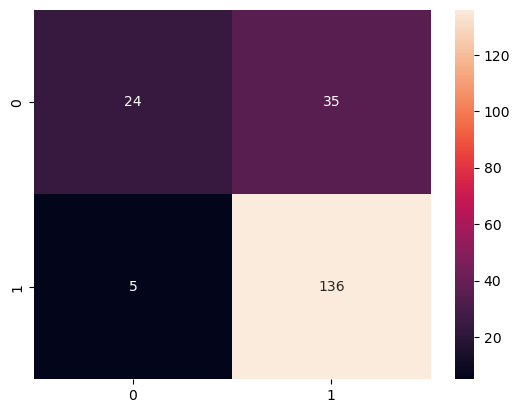

ROC-AUC-Score: 0.83


In [138]:
# Klassifikationsbericht
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred_rf))

# Confusion-Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='.3g')
plt.show()

# ROC-AUC-Score
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
roc_score_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"ROC-AUC-Score: {roc_score_rf:.2f}")

### Modell 3: XGBoost
- 1. Modell trainieren

In [142]:
from xgboost import XGBClassifier

# Modell initialisieren und trainieren
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Vorhersagen auf Testdaten
y_pred_xgb = xgb_model.predict(X_test)


- 2. Modell bewerten

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.75      0.56      0.64        59
           1       0.83      0.92      0.88       141

    accuracy                           0.81       200
   macro avg       0.79      0.74      0.76       200
weighted avg       0.81      0.81      0.81       200

XGBoost:
[[ 33  26]
 [ 11 130]]


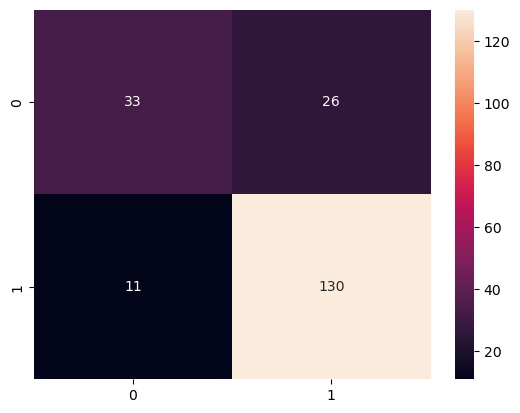

ROC-AUC-Score: 0.83


In [144]:
# Klassifikationsbericht
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred_xgb))

# Confusion-Matrix
print("XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='.3g')
plt.show()

# ROC-AUC-Score
y_pred_xgb = xgb_model.predict_proba(X_test)[:, 1]
roc_score_xgb = roc_auc_score(y_test, y_pred_xgb)
print(f"ROC-AUC-Score: {roc_score_xgb:.2f}")

### Modell 4: KNN
- 1. Modell trainieren

In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [150]:
# Standardisierung der Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [152]:
# KNN-Modell mit k=5 trainieren
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.65      0.44      0.53        59
           1       0.79      0.90      0.84       141

    accuracy                           0.77       200
   macro avg       0.72      0.67      0.68       200
weighted avg       0.75      0.77      0.75       200

Confusion-Matrix:
[[ 26  33]
 [ 14 127]]


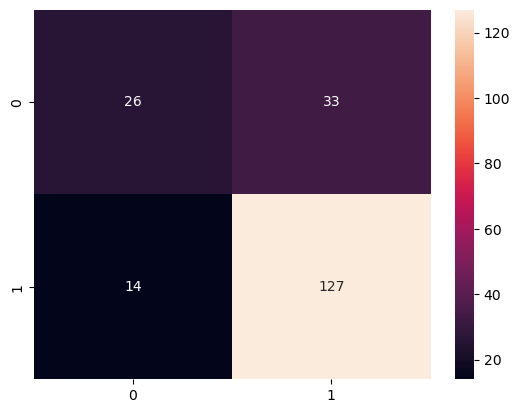

ROC-AUC: 0.771246544055776


In [154]:
# Vorhersagen
y_pred = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]

# Klassifikationsbericht und Confusion-Matrix
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

print("Confusion-Matrix:")
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.3g')
plt.show()

# ROC-AUC-Berechnung
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")


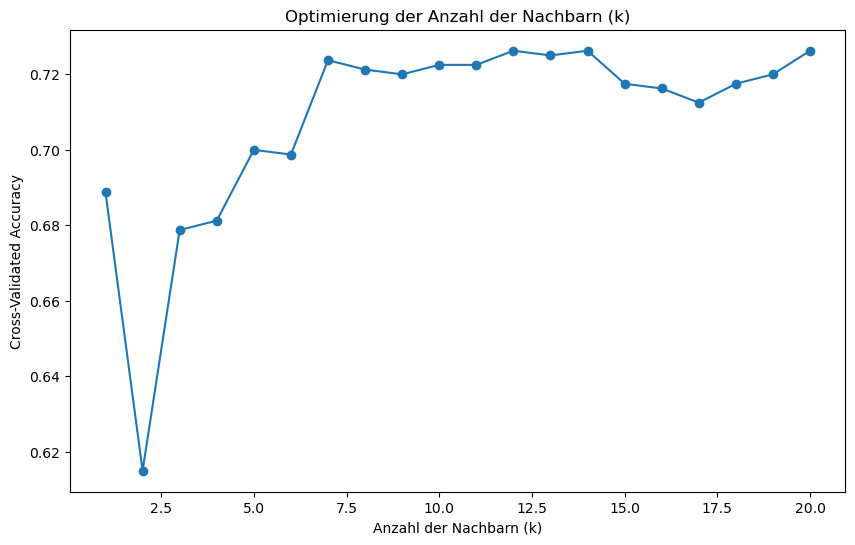

In [156]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Teste verschiedene Werte von k
k_values = range(1, 21)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    scores.append(cv_scores.mean())

# Plot der Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.xlabel("Anzahl der Nachbarn (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Optimierung der Anzahl der Nachbarn (k)")
plt.show()


In [158]:
# KNN-Modell mit optimalem k trainieren
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=12)

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.65      0.41      0.50        59
           1       0.79      0.91      0.84       141

    accuracy                           0.76       200
   macro avg       0.72      0.66      0.67       200
weighted avg       0.74      0.76      0.74       200

Confusion-Matrix:
[[ 24  35]
 [ 13 128]]


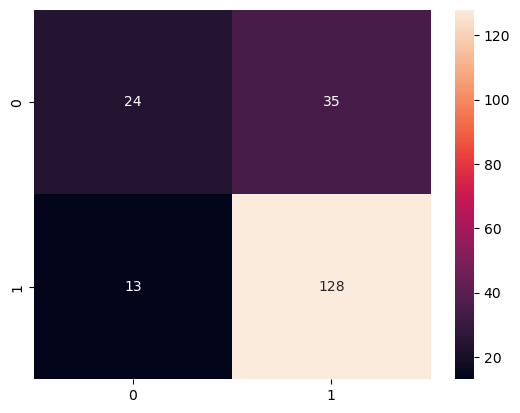

ROC-AUC: 0.7438995071523019


In [160]:
# Vorhersagen
y_pred = knn.predict(X_test_scaled)
y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]

# Klassifikationsbericht und Confusion-Matrix
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

print("Confusion-Matrix:")
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.3g')
plt.show()

# ROC-AUC-Berechnung
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc}")


### Interpretation

- Logistische Regression:

Gute Ergebnisse, insbesondere bei der Vorhersage von Klasse 1 (Recall = 0.92).
Etwas schwächer bei der Klasse 0, was auf ein leichtes Ungleichgewicht in den Daten hinweisen könnte.

- Random Forest:

Insgesamt etwas besser als die logistische Regression (ROC-AUC = 0.81).
Es zeigt eine starke Balance zwischen Precision und Recall für Klasse 1.

- XGBoost:

Das leistungsstärkste Modell in deinem Vergleich.
Höhere Precision (0.82) für Klasse 1, was wichtig ist, wenn Fehlalarme (False Positives) reduziert werden sollen.

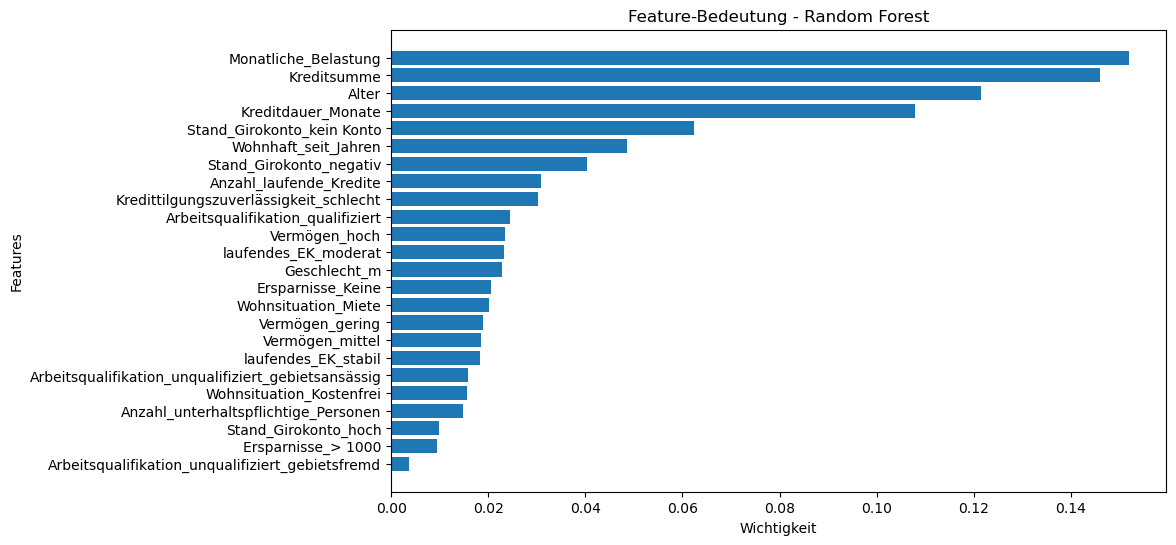

,Feature,Importance
0,Monatliche_Belastung,0.152047
1,Kreditsumme,0.145994
2,Alter,0.121462
3,Kreditdauer_Monate,0.107948
4,Stand_Girokonto_kein Konto,0.062399
5,Wohnhaft_seit_Jahren,0.048555
6,Stand_Girokonto_negativ,0.040442
7,Anzahl_laufende_Kredite,0.030932
8,Kredittilgungszuverlässigkeit_schlecht,0.030289
9,Arbeitsqualifikation_qualifiziert,0.024380


In [162]:
# Beispiel: Feature-Bedeutung für Random Forest analysieren und visualisieren
importances = rf_model.feature_importances_

# Sortieren der Features nach Wichtigkeit
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Visualisierung der Feature-Bedeutung
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.gca().invert_yaxis()  # Wichtigstes Feature oben
plt.title("Feature-Bedeutung - Random Forest")
plt.xlabel("Wichtigkeit")
plt.ylabel("Features")
plt.show()

### Analyse der Feature-Bedeutung:

- Wichtigste Features:

Kreditsumme und Monatliche Belastung sind die entscheidenden Prädiktoren, was logisch ist, da sie direkt die finanzielle Situation und das Risiko eines Kreditnehmers beeinflussen.
Alter und Kreditdauer_Monate spielen ebenfalls eine wichtige Rolle, da sie die Dauer und die Höhe der Verpflichtungen widerspiegeln.

- Mittlere Bedeutung:

Stand_Girokonto (z. B. kein Konto oder negativ) zeigt eine moderate Bedeutung. Dies ist ein wichtiger Indikator für die finanzielle Stabilität der Kunden.
Wohnhaft_seit_Jahren deutet darauf hin, dass eine längere Wohnzeit an einem Ort potenziell mit einem geringeren Risiko assoziiert wird.

- Geringere Bedeutung:

Merkmale wie Arbeitsqualifikation_unqualifiziert oder Ersparnisse > 1000 scheinen eine niedrigere Rolle zu spielen, könnten aber in Kombination mit anderen Variablen wichtig sein.

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

## 1. Hyperparameter-Tuning für Log Reg

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Parametergrid definieren
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # L1 unterstützt nur 'liblinear'
}

# Modell initialisieren
logreg = LogisticRegression(random_state=42)

# GridSearchCV
logreg_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid_logreg,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

# Fitting
logreg_search.fit(X_train, y_train)

# Beste Parameter ausgeben
print("Beste Parameter für Logistische Regression:", logreg_search.best_params_)


Beste Parameter für Logistische Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


## 2. Hyperparameter-Tuning für Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier

# Parametergrid definieren
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomForest initialisieren
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
rf_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

# Fitting
rf_search.fit(X_train, y_train)

# Beste Parameter ausgeben
print("Beste Parameter für Random Forest:", rf_search.best_params_)


Beste Parameter für Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


## 3. Hyperparameter-Tuning für XGBoost

In [170]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Parametergrid definieren
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0]
}

# XGBoost Modell initialisieren
xgb = XGBClassifier(random_state=42)

# RandomizedSearchCV
xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid_xgb,
    n_iter=50,
    scoring='f1_macro',  # Oder 'recall_macro', je nach Ziel
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fitting
xgb_search.fit(X_train, y_train)

# Beste Parameter ausgeben
print("Beste Parameter für XGBoost:", xgb_search.best_params_)


Beste Parameter für XGBoost: {'subsample': 0.6, 'n_estimators': 50, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.2}


## Getunte Modelle vergleichen

In [173]:
# XGBoost
xgb_best = XGBClassifier(
    learning_rate=0.1,  # Beispielparameter aus Tuning
    max_depth=5,
    n_estimators=100,
    min_child_weight=3,
    subsample=0.8,
    random_state=42
)
xgb_best.fit(X_train, y_train)

# Logistische Regression
logreg_best = LogisticRegression(
    C=10,
    penalty='l1',
    solver='liblinear',
    random_state=42
)
logreg_best.fit(X_train, y_train)

# Random Forest
rf_best = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_best.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [175]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

# Funktion zur Evaluierung
def evaluate_model_with_roc(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Wahrscheinlichkeiten für Klasse 1
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    print(f"--- {model_name} ---")
    print(classification_report(y_test, y_pred))
    print("Confusion-Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    return fpr, tpr, roc_auc

In [177]:
fpr_xgb, tpr_xgb, roc_auc_xgb = evaluate_model_with_roc(xgb_best, X_test, y_test, "XGBoost")
fpr_logreg, tpr_logreg, roc_auc_logreg = evaluate_model_with_roc(logreg_best, X_test, y_test, "Logistische Regression")
fpr_rf, tpr_rf, roc_auc_rf = evaluate_model_with_roc(rf_best, X_test, y_test, "Random Forest")

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.82      0.53      0.64        59
           1       0.83      0.95      0.88       141

    accuracy                           0.82       200
   macro avg       0.82      0.74      0.76       200
weighted avg       0.82      0.82      0.81       200

Confusion-Matrix:
[[ 31  28]
 [  7 134]]
--- Logistische Regression ---
              precision    recall  f1-score   support

           0       0.68      0.39      0.49        59
           1       0.78      0.92      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.66      0.67       200
weighted avg       0.75      0.77      0.74       200

Confusion-Matrix:
[[ 23  36]
 [ 11 130]]
--- Random Forest ---
              precision    recall  f1-score   support

           0       0.82      0.39      0.53        59
           1       0.79      0.96      0.87       141

    accuracy                   

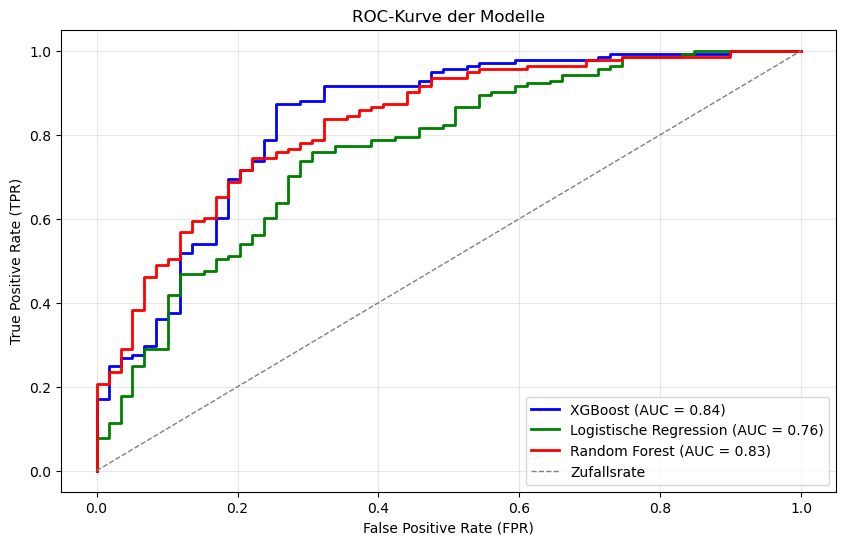

In [179]:
plt.figure(figsize=(10, 6))

# ROC-Kurve für XGBoost
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# ROC-Kurve für Logistische Regression
plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label=f'Logistische Regression (AUC = {roc_auc_logreg:.2f})')

# ROC-Kurve für Random Forest
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Diagonale für Zufallsmodell
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Zufallsrate')

# Diagramm-Einstellungen
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-Kurve der Modelle')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


### Empfehlung
Basierend auf diesen Ergebnissen sollte die weitere Arbeit wie folgt aussehen:

- Primäres Modell:

    XGBoost sollte priorisiert werden, da es insgesamt die besten Metriken liefert.
    Es zeigt ein ausgewogenes Verhältnis zwischen Precision und Recall.

- Sekundäres Modell:

    Der Random Forest ist ebenfalls ein starkes Modell und könnte als Alternative verwendet werden, insbesondere wenn Recall für Klasse 1 besonders wichtig ist (z. B. in einem Szenario, in dem kein positiver Fall verpasst werden darf).

### Optimierung der Modelle:

- XGBoost: Es lohnt sich, das Modell weiter zu optimieren. Die wichtigsten Hyperparameter wie learning_rate, n_estimators, max_depth und subsample könnten noch feiner abgestimmt werden.
- Random Forest: Erwäge, die Anzahl der Bäume (n_estimators) und die maximal erlaubte Tiefe (max_depth) weiter zu variieren, um die Precision zu verbessern.
- Logistische Regression: Fokus auf Regularisierung, z. B. Feinanpassung von C und der Wahl des penalty-Parameters.

- Feature-Bedeutung analysieren:

Nutze die Feature-Bedeutungen aus XGBoost und Random Forest, um sicherzustellen, dass die wichtigsten Merkmale hervorgehoben werden.
Eventuell weitere unwichtige Features entfernen, um die Modellkomplexität zu reduzieren.

- Finale Evaluierung:

Führe eine detaillierte Kreuzvalidierung durch, um die Robustheit der Modelle zu überprüfen.
Vergleiche die Modelle erneut nach weiteren Optimierungen, um das endgültige Modell für den Einsatz auszuwählen.

### Bedeutung der ROC-Kurve

Achsen:

- False Positive Rate (FPR): Anteil der fälschlicherweise als positiv klassifizierten negativen Fälle.
- True Positive Rate (TPR): Anteil der korrekt als positiv klassifizierten positiven Fälle.
- Die diagonale gestrichelte Linie zeigt die Zufallsrate an (d.h. keine Diskriminationsfähigkeit).

Ein gutes Modell hat eine ROC-Kurve, die weit oben links liegt, was eine hohe TPR und eine niedrige FPR bedeutet.

### Leistung der Modelle

- XGBoost (blau):
    - AUC = 0.84: Dies zeigt, dass XGBoost das stärkste Modell ist und die Zielklassen am besten unterscheidet.
    - Die Kurve liegt in den meisten Bereichen höher als die der anderen Modelle.

- Random Forest (rot):
    - AUC = 0.83: Ähnlich gut wie XGBoost, aber leicht unterlegen. Die Modelle sind vergleichbar, aber XGBoost hat minimal bessere Ergebnisse.

- Logistische Regression (grün):
    - AUC = 0.76: Dieses Modell zeigt die schwächste Leistung. Es trennt die Zielklassen weniger gut als die anderen beiden Modelle.
    - Die ROC-Kurve liegt deutlich näher an der Zufallsrate als die der anderen Modelle.

In [ ]:
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************
# *************************************************************************************************************************************

# Szenarioanalysen

### Szenarioanalysen im Kontext des Kreditrisikomodells

Szenarioanalysen sind ein effektives Werkzeug, um die Auswirkungen potenzieller Änderungen der Eingangsvariablen (Features) oder äußerer Bedingungen auf die Modellvorhersagen zu bewerten. Im Fall eines Kreditrisikomodells könnten Szenarioanalysen wie folgt gestaltet werden:

### Ziele der Szenarioanalyse

- Was-wäre-wenn-Analysen: Wie ändern sich die Kreditrisikovorhersagen, wenn bestimmte Variablen angepasst werden?
- Sensitivitätsanalyse: Welche Features haben den größten Einfluss auf die Vorhersage?
- Extremszenarien: Wie verhält sich das Modell in außergewöhnlichen Situationen?

## Definition realistischer Szenarien für das Kreditrisikomodell

Um die Szenarien realitätsnah zu gestalten, orientieren wir uns an typischen Situationen, die in der Kreditvergabe häufig auftreten. Diese Szenarien sollen relevante wirtschaftliche und individuelle Faktoren berücksichtigen.

### 1. Szenario-Ideen

#### a. Wirtschaftliche Unsicherheit (Krise oder Rezession):
Kreditsumme steigt, da Kunden mehr finanzielle Mittel benötigen.
Kreditlaufzeiten werden länger, um Rückzahlungsraten zu reduzieren.

- Änderungen:
    - Kreditsumme: +30 %
    - Kreditdauer_Monate: +10 %

#### b. Positive wirtschaftliche Entwicklung (Wachstumsszenario):
Kreditsumme sinkt, da Kunden mehr Eigenkapital einbringen können.
Kreditlaufzeiten verkürzen sich.

- Änderungen:
    - Kreditsumme: -15 %
    - Kreditdauer_Monate: -10 %

#### d. Familiengründungsszenario:
Kunden nehmen Kredite auf, um z. B. eine Immobilie zu kaufen.
Kreditlaufzeit wird deutlich verlängert.

- Änderungen:
    - Kreditsumme: +25 %
    - Kreditdauer_Monate: +30 %

### 2. Umsetzung: Mit dem am besten performendem Modell ---> XGBoost

In [182]:
# Szenarien anwenden
def apply_scenario(data, changes):
    """
    Wendet Szenarioanpassungen auf die Daten an und berechnet die monatliche Belastung basierend
    auf Kreditsumme und Kreditdauer_Monate.

    Args:
        data (pd.DataFrame): Originaldatensatz.
        changes (dict): Änderungen für numerische Features.

    Returns:
        pd.DataFrame: Angepasster Datensatz.
    """
    scenario_data = data.copy()
    
    # Anpassung der numerischen Features
    for column, change in changes.items():
        if column in scenario_data.columns:
            scenario_data[column] *= (1 + change / 100)
    
    # Monatliche Belastung neu berechnen
    if "Kreditsumme" in changes or "Kreditdauer_Monate" in changes:
        scenario_data["Monatliche_Belastung"] = (
            scenario_data["Kreditsumme"] / scenario_data["Kreditdauer_Monate"]
        ).fillna(0)  # Schutz vor Division durch null
    
    return scenario_data

# Szenarien definieren
scenarios = {
    "Wirtschaftliche Unsicherheit": {"Kreditsumme": 30, "Kreditdauer_Monate": 10},
    "Wirtschaftliches Wachstum": {"Kreditsumme": -15, "Kreditdauer_Monate": -10},
    "Familiengründung": {"Kreditsumme": 25, "Kreditdauer_Monate": 30}
}

# Szenarien anwenden
scenario_data = {
    name: apply_scenario(X_test, changes) for name, changes in scenarios.items()
}

### 3. Ergebnisse analysieren
Für jedes Szenario berechnest du die Vorhersagen und analysierst, wie sich die Risikoeinschätzungen verändern:

In [184]:
scenario_results = {}
for name, data in scenario_data.items():
    y_pred = xgb_model.predict(data)
    y_pred_proba = xgb_model.predict_proba(data)[:, 1]
    scenario_results[name] = {
        "Avg_WSK_guter_Kredit": y_pred_proba.mean(),
        "Klasse_0_Anzahl": (y_pred == 0).sum(),
        "Klasse_1_Anzahl": (y_pred == 1).sum()
    }

# Ergebnisse anzeigen

results_df = pd.DataFrame(scenario_results).T

In [186]:
results_df

,Avg_WSK_guter_Kredit,Klasse_0_Anzahl,Klasse_1_Anzahl
Wirtschaftliche Unsicherheit,0.759911,47.0,153.0
Wirtschaftliches Wachstum,0.785783,36.0,164.0
Familiengründung,0.762479,41.0,159.0


### 4. Interpretation der Ergebnisse der Szenarioanalyse:

### 1. Wirtschaftliche Unsicherheit

- Durchschnittliche Wahrscheinlichkeit (gute Kredite): 0.7599
    - Diese Wahrscheinlichkeit ist im Vergleich zu den anderen Szenarien moderat, was darauf hindeutet, dass wirtschaftliche Unsicherheit die Kreditwürdigkeit verschlechtert, jedoch nicht drastisch.
- Anzahl "schlechte Kredite" (Klasse 0): 47
    - Die höchste Anzahl an "schlechte Kredite"-Fällen unter allen Szenarien, was die Auswirkungen einer wirtschaftlichen Unsicherheit auf die finanzielle Stabilität widerspiegelt.
- Anzahl "gute Kredite" (Klasse 1): 153
    - Leicht reduziert im Vergleich zu den anderen Szenarien, was auf eine insgesamt negativere Kreditwürdigkeit hinweist.

### 2. Wirtschaftliches Wachstum

- Durchschnittliche Wahrscheinlichkeit (gute Kredite): 0.7858
    - Dies zeigt eine höhere Wahrscheinlichkeit für "gute Kredite", was durch wirtschaftliche Stabilität und positive Entwicklungen begünstigt wird.
- Anzahl "schlechte Kredite" (Klasse 0): 36
    - Die niedrigste Anzahl an "schlechte Kredite"-Kunden, was auf bessere finanzielle Rahmenbedingungen hinweist.
- Anzahl "gute Kredite" (Klasse 1): 164
    - Die höchste Anzahl unter allen Szenarien, was zeigt, dass wirtschaftliches Wachstum die Bonität fördert.

### 3. Familiengründung

- Durchschnittliche Wahrscheinlichkeit (gute Kredite): 0.7625
    - Eine solide Wahrscheinlichkeit für "gute Kredite", was darauf hindeutet, dass Familiengründung und der damit einhergehende Kreditbedarf mit stabilen finanziellen Rahmenbedingungen einhergehen.
- Anzahl "schlechte Kredite" (Klasse 0): 41
    - Im mittleren Bereich unter allen Szenarien, was zeigt, dass Familiengründungen finanziell solide sind, jedoch Risiken bestehen können.
- Anzahl "gute Kredite" (Klasse 1): 159
    - Eine starke Anzahl, die die Stabilität dieses Szenarios untermauert.

### Zusammenfassung der Szenarien

- Wirtschaftliche Unsicherheit:
    - Dieses Szenario hat die negativsten Auswirkungen auf die Kreditwürdigkeit, was sich in der höchsten Anzahl von "schlechte Kredite" und der geringsten durchschnittlichen Wahrscheinlichkeit für "gute Kredite" zeigt.

- Wirtschaftliches Wachstum:
    - Es fördert die Kreditwürdigkeit erheblich und zeigt die besten Ergebnisse für "gute Kredite".

- Familiengründung:
    - Die Kreditwürdigkeit bleibt stabil, mit positiven Auswirkungen, jedoch etwas geringer als im Wachstums-Szenario.

### Interpretation für Geschäftsentscheidungen

- Wirtschaftliche Unsicherheit:
    - Banken sollten in Zeiten wirtschaftlicher Unsicherheit vorsichtiger Kredite vergeben und strengere Bonitätsprüfungen durchführen.

- Wirtschaftliches Wachstum:
    - Diese Phase ermöglicht es Banken, ihre Kreditvergabe auszuweiten, insbesondere an Kunden mit stabilen Vermögensverhältnissen.

- Familiengründung:
    - Kredite für Familiengründungen sollten durch spezifische Angebote wie Immobilienkredite oder Förderkredite unterstützt werden, da diese Kundengruppe tendenziell kreditwürdig ist.

Diese Szenarioanalyse zeigt, wie sich unterschiedliche wirtschaftliche und persönliche Bedingungen auf die Kreditwürdigkeit auswirken. Sie bietet eine Grundlage für datengetriebene Entscheidungen im Kreditrisikomanagement und der Kreditstrategie von Banken.